# <span style ="color:lightgreen"> PROBLEM STATEMENT </span>

#### -  There is a <span style ="color:orange"> P2P(peer to peer) lending market </span> and this company provides loan on basis of their financial strengths and social strengths.
#### - Financial Factors:- <span style ="color:yellow"> - Credit Score - Income Level - Employment Status - Debt-to-Income Ratio - Loan Amount Requested - Previous Loan History - Monthly Expenses </span>
##### - <span style ="color:orange"> Here we need a predict whether the borrowers could be funded with lower interest, and the lenders are receiving the timely payments. </span>
#### -  we have two target columns one is <span style ="color:orange"> Loan status (categorical) </span> and second one is  <span style ="color:orange"> borrower rate (numerical and continuous). </span>
#### -  In total we need to propose a model by which it should predict the <span style ="color:yellow"> LOAN STATUS </span>

# <span style = "color:lightpink">Hypothesis </span>

#### - <span style = "color:yellow"> H1:</span> Combining financial factors with social factors can enhance the ability to predict performance in P2P lending market </span>
#### - <span style = "color:yellow"> H2:</span> Social strength is more important than financial strength when predict lenders’ performance.
#### - <span style = "color:yellow"> H3:</span> Social strength is more important than financial strength when predict borrowers’ performance.
#### - <span style = "color:yellow"> H4:</span> Combining financial strength and social strength factors can distinguish borrower

# <span style="color:lightgreen; font-family: Times New Roman">LOADING PACKAGES & DATA</span>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

### Reading the CSV/File/Data

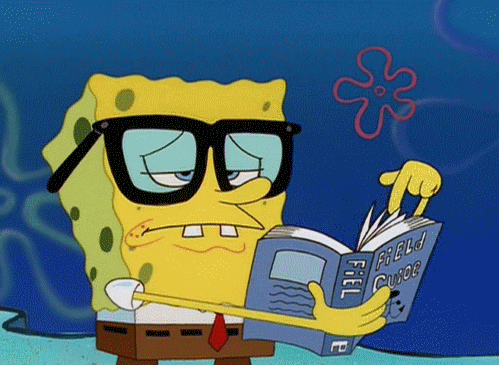

In [5]:
data = pd.read_csv("prosperLoanData.csv")

# <span style="color:lightgreen; font-family: Comic Sans MS">DATA STRUCTURE & CLEANING</span>

In [5]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [6]:
data.shape

(113937, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
data.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [9]:
data.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

##### Checking the Columns which are having NULL

In [10]:
null_counts = data.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

#### Checking for the unique columns

In [11]:
data_cate = data.select_dtypes(include = 'object')
data_cate.columns

Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [6]:
data_cate = data[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus','ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation','EmploymentStatus','DateCreditPulled','FirstRecordedCreditLine', 'IncomeRange', 'LoanKey','LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey']]
for column in data_cate.columns:
    print(f"Column: {column}")
    print(data_cate[column].unique())  # Unique values in each column
    print("\n")

Column: ListingKey
['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']


Column: ListingCreationDate
['2007-08-26 19:09:29.263000000' '2014-02-27 08:28:07.900000000'
 '2007-01-05 15:00:47.090000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']


Column: CreditGrade
['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']


Column: LoanStatus
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']


Column: ClosedDate
['2009-08-14 00:00:00' nan '2009-12-17 00:00:00' ... '2006-10-25 00:00:00'
 '2005-12-08 00:00:00' '2005-11-25 00:00:00']


Column: ProsperRating (Alpha)
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']


Column: BorrowerState
['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' '

- <span style="color:lightgreen">Findings:- </span> Here is all the unique values from the all the categorical columns except <span style="color:lightskyblue"> "Groupkey" </span> which is havng more unique values

#### Boolean columns are

In [7]:
data_bool = data.select_dtypes(include = 'bool')
data_bool.head()

IsBorrowerHomeowner  CurrentlyInGroup  IncomeVerifiable
0                 True              True              True
1                False             False              True
2                False              True              True
3                 True             False              True
4                 True             False              True

- we are having boolean columns of <span style = "color:yellow"> IsBorrowerHomeowner </span>	and <span style = "color:yellow"> CurrentlyInGroup </span> and <span style = "color:yellow"> IncomeVerifiable  </span>

### Data Cleaning

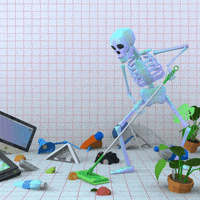

In [8]:
data.duplicated().sum()

0

In [15]:
#####################################################################################################################################################################
#********************* The Columns which are having the more unique keys or unique id's as they are not much meaning to the further analysis **********************#
#****************************************************************** And The columns are ***************************************************************************#
#********************************************* 'ListingKey' , 'GroupKey' , 'LoanKey' , 'MemberKey' *****************************************************************#
#####################################################################################################################################################################

In [9]:
data.drop(columns= ['ListingKey' , 'GroupKey' , 'LoanKey' , 'MemberKey'], inplace = True)

Finally removed or dropped the columns <span style = "color:yellow"> 'ListingKey'</span> , <span style = "color:yellow"> 'GroupKey' </span>, <span style = "color:yellow"> 'LoanKey' </span>, <span style = "color:yellow">'MemberKey'</span>

#### Applying the data columns

In [10]:
# Columns are identified and taken from the prosper data
# changing into datetime columns
date_columns = ['ListingCreationDate','DateCreditPulled','LoanOriginationDate','ClosedDate','FirstRecordedCreditLine']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])
print(data.dtypes)

ListingNumber                           int64
ListingCreationDate            datetime64[ns]
CreditGrade                            object
Term                                    int64
LoanStatus                             object
                                    ...      
PercentFunded                         float64
Recommendations                         int64
InvestmentFromFriendsCount              int64
InvestmentFromFriendsAmount           float64
Investors                               int64
Length: 77, dtype: object


#### Converting the boolean columns to Numerical

In [11]:
# converting the bool columns to numerical such that will have only data containing of numerical,category and data type
data['IsBorrower_Homeowner'] = data['IsBorrowerHomeowner'].map({True: 1,False: 0})  # mapping true value as 1 and false as 0
data['CurrentlyInGroup'] = data['CurrentlyInGroup'].map({True: 1,False: 0}) # mapping true value as 1 and false as 0
data['IncomeVerifiable'] = data['IncomeVerifiable'].map({True: 1,False: 0}) # mapping true value as 1 and false as 0

- <span style="color:lightgreen">Findings:- </span> Here we have changed the boolean columns to Numerical <span style="color:lightskyblue"> as 1 and 0 </span> 

In [12]:
data.drop(columns= "IsBorrowerHomeowner",inplace = True)

#### Extracting and creating year column

In [13]:
# Extracting the year from the datatime column and creating a date column will be used in the further analysis
data['year'] = pd.to_datetime(data['LoanOriginationDate']).dt.year

## Target Labelling

In [14]:
# converting loan status(target variable) to binary category by adding an another column Status
def tgt_binary(df):
    df["Loan_Status"] = df["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)
    #df["Loan_Status"] = df["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x > 180 else 0)
    return df
data = tgt_binary(data)
data.head()

ListingNumber     ListingCreationDate CreditGrade  Term LoanStatus  \
0         193129 2007-08-26 19:09:29.263           C    36  Completed   
1        1209647 2014-02-27 08:28:07.900         NaN    36    Current   
2          81716 2007-01-05 15:00:47.090          HR    36  Completed   
3         658116 2012-10-22 11:02:35.010         NaN    36    Current   
4         909464 2013-09-14 18:38:39.097         NaN    36    Current   

  ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0 2009-08-14      0.16516        0.1580       0.1380                      NaN   
1        NaT      0.12016        0.0920       0.0820                  0.07960   
2 2009-12-17      0.28269        0.2750       0.2400                      NaN   
3        NaT      0.12528        0.0974       0.0874                  0.08490   
4        NaT      0.24614        0.2085       0.1985                  0.18316   

   ...  LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments  PercentFunded  \
0  ...                  0.0                              0.0            1.0   
1  ...                  0.0                              0.0            1.0   
2  ...                  0.0                              0.0            1.0   
3  ...                  0.0                              0.0            1.0   
4  ...                  0.0                              0.0            1.0   

  Recommendations  InvestmentFromFriendsCount  InvestmentFromFriendsAmount  \
0               0                           0                          0.0   
1               0                           0                          0.0   
2               0                           0                          0.0   
3               0                           0                          0.0   
4               0                           0                          0.0   

  Investors IsBorrower_Homeowner  year  Loan_Status  
0       258                    1  2007            0  
1         1                    0  2014            1  
2        41                    0  2007            0  
3       158                    1  2012            1  
4        20                    1  2013            1  

[5 rows x 79 columns]

In [15]:
data.Loan_Status.value_counts()

1    58848
0    55089
Name: Loan_Status, dtype: int64

In [16]:
data['Loan_Status'] = data.Loan_Status.astype('category')

# <span style="color:lightgreen; font-family: Lucida Console">EXPLORATORY    DATA    ANALYSIS</span>

### <span style="color:lightgreen; font-family: Lucida Console">Before handling Null & Outliers</span>

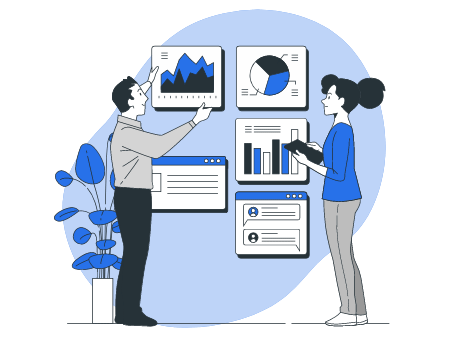

### <span style="color:#E6E6FA; font-family: Georgia">Univariate Analysis</span>

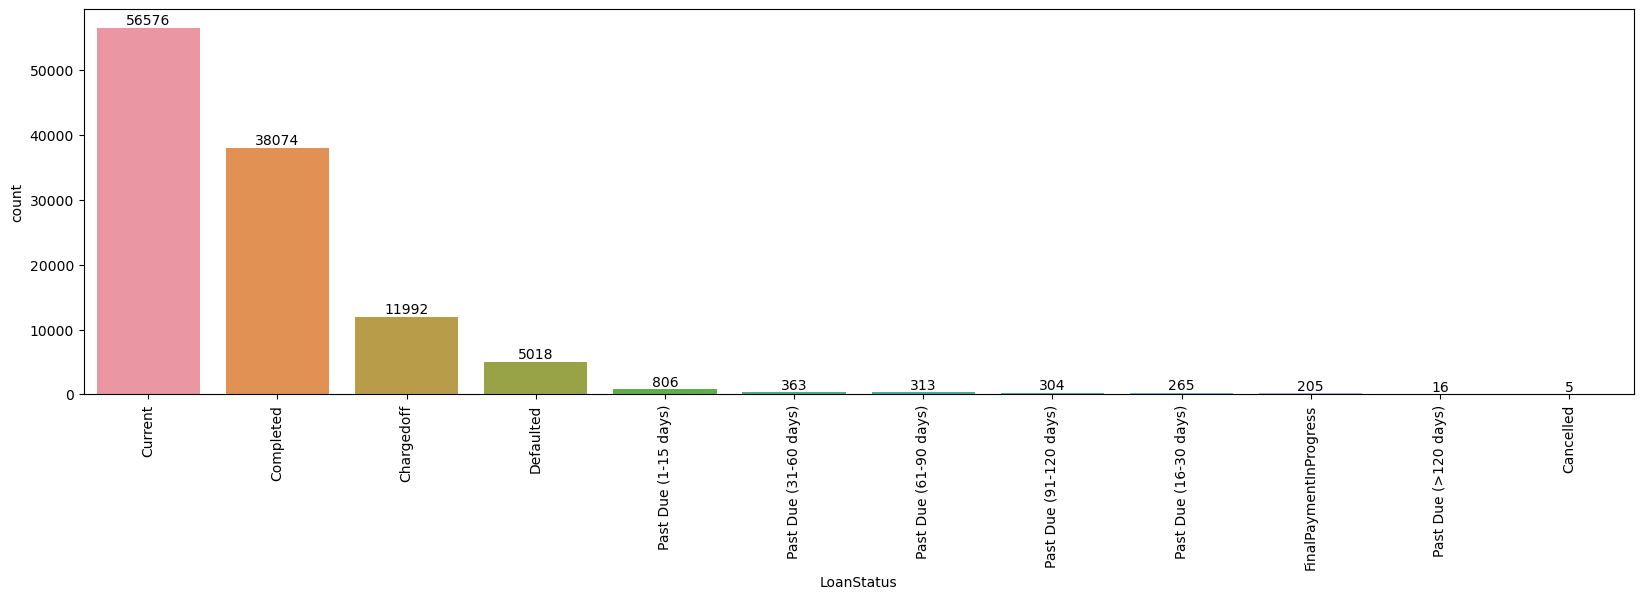

In [17]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x = 'LoanStatus',order=data['LoanStatus'].value_counts().index,data = data)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this We observed that we have more Current loans with <span style= "color:yellow">  56576</span>, such that loans are more in open state than the completed loans are <span style= "color:yellow">  38074 </span>
- There are less cancelled loans with <span style= "color:yellow">  5 </span> and past due loans are with <span style= "color:yellow"> 806+265+313+363+304+16 = 2067</span>  and that will be positive sign
- And people with final payments to done are <span style= "color:yellow">  205 </span>
- while the Chargedoff (lender's loss - a loan as unlikely to be collected is) with   <span style= "color:yellow"> 11992 </span>
- while defaulted is (when the borrower misses payments or fails to fulfill other obligations specified in the loan agreement) and with <span style= "color:yellow"> 5018 </span>

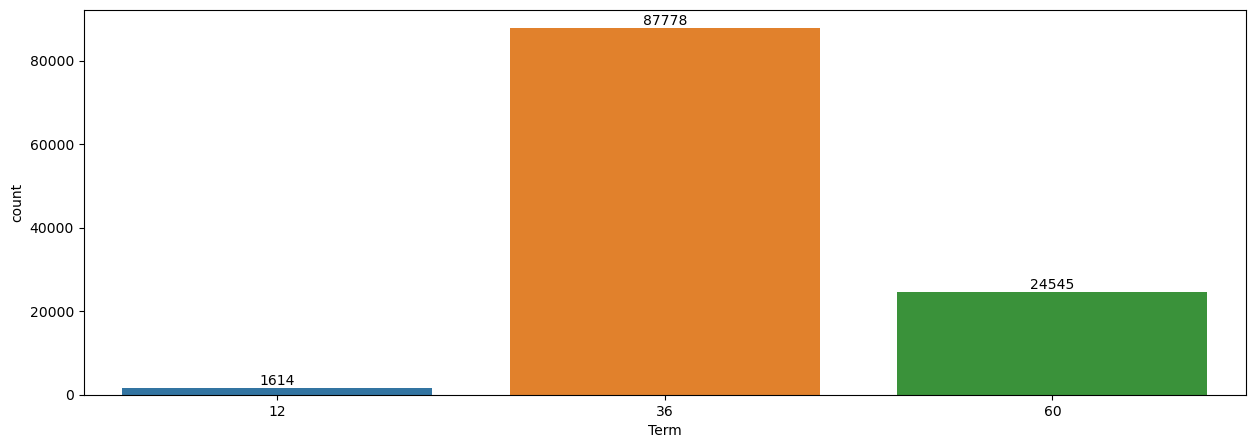

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = 'Term',data = data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- It is observed that More people are taking loans for <span style= "color:yellow"> 36 </span> months term, compatively less people are taking loans for <span style= "color:yellow"> 60 </span> months term, very less people are taking loans for <span style= "color:yellow"> 12 </span> months term

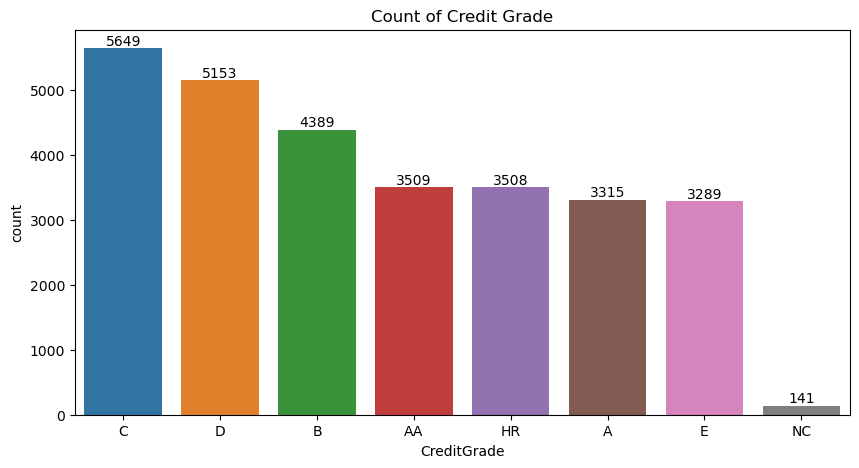

In [19]:

plt.figure(figsize=(10,5))
ax = sns.countplot(x='CreditGrade',order=data['CreditGrade'].value_counts().index,data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count of Credit Grade')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- C (fair or Average)Creditgrade is with high people <span style= "color:yellow"> 5649 </span> 
- D (sub prime)Creditgrade is with second highest people <span style= "color:yellow"> 5153 </span> 
- B (Good)Creditgrade is with third highest people <span style= "color:yellow"> 4389 </span> 
- AA (Higher credit quality than Prime)Creditgrade is with fourth highest people <span style= "color:yellow"> 3509 </span> 
- HR (High-Risk)Creditgrade is with <span style= "color:yellow"> 3508 </span> 
- A (Prime)Creditgrade is with <span style= "color:yellow"> 3315 </span>
- E (Below subprime)Creditgrade is with  <span style= "color:yellow"> 3289 </span> 

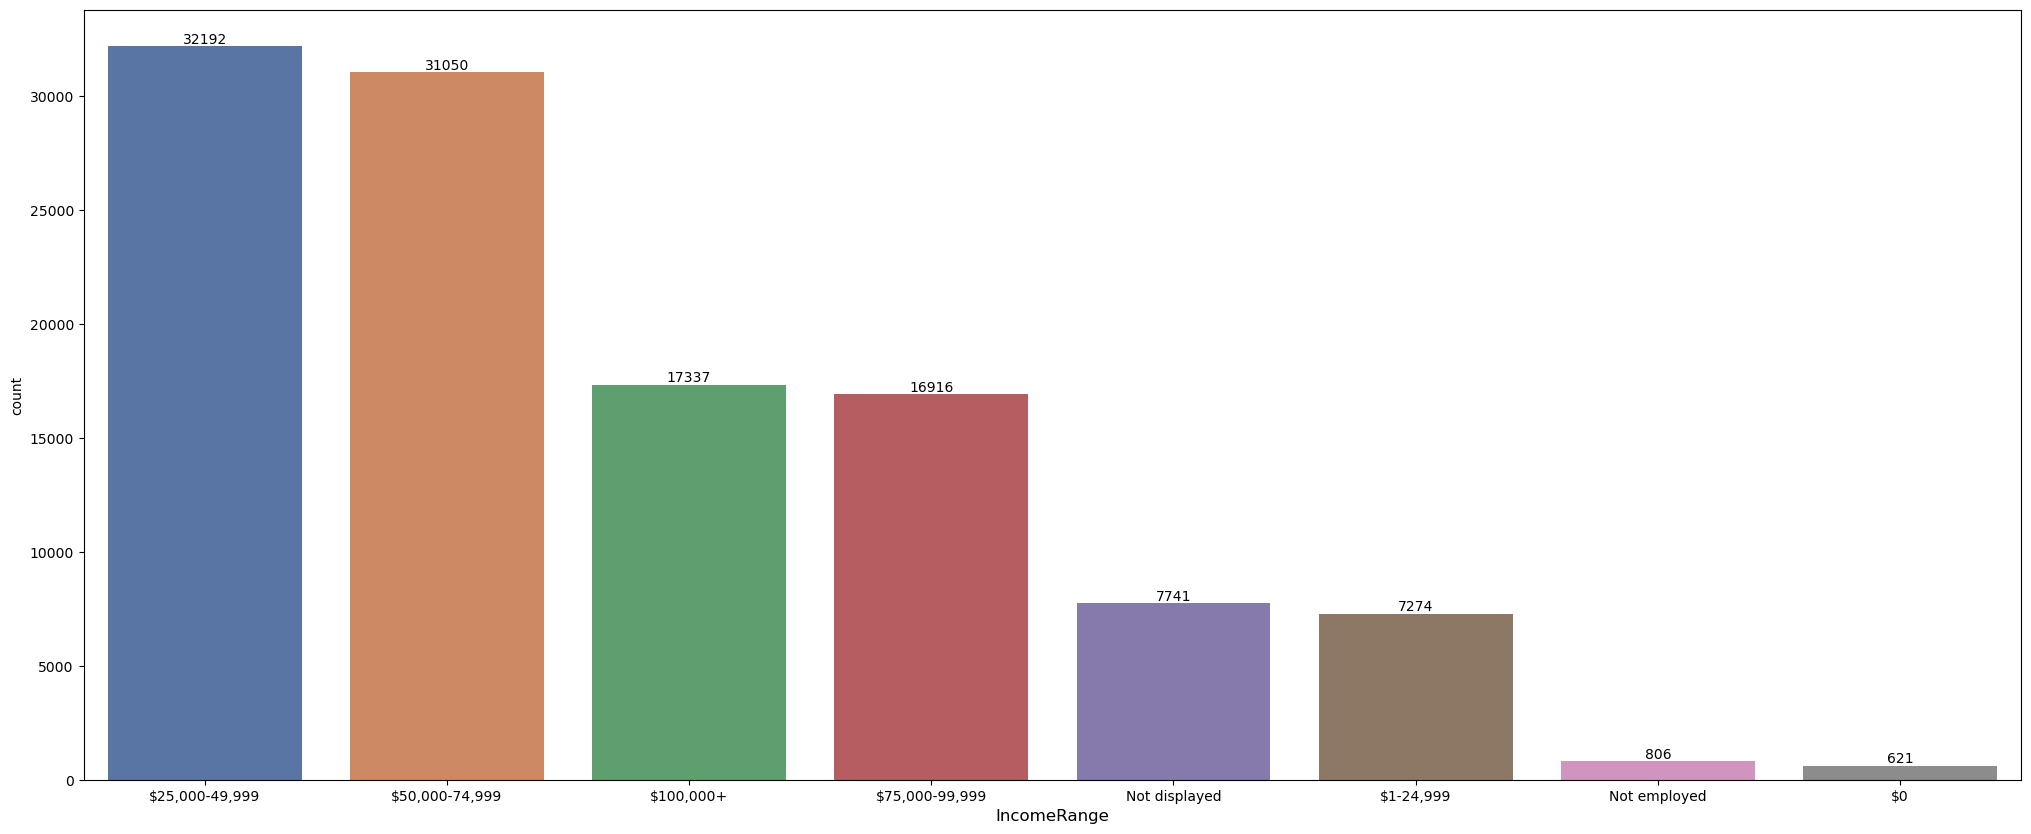

In [20]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='IncomeRange' ,order=data['IncomeRange'].value_counts().index, data = data ,palette= 'deep')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('IncomeRange', fontsize=12)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- $25,000-49,999 (Income-Range) is with high people <span style= "color:yellow"> 32192 </span> 
- $50,000-74,999 (Income-Range) is with second high people <span style= "color:yellow"> 31050 </span> 
- $100,000+ (Income-Range) is with third high people <span style= "color:yellow"> 17337 </span> 
- $75,000-99,999 (Income-Range) is with  <span style= "color:yellow"> 16916 </span> 
- Not displayed (Income-Range) is with <span style= "color:yellow"> 7741 </span>
- $1-24,999 (Income-Range) is with  <span style= "color:yellow"> 7274 </span>
- Not Employed is with <span style= "color:yellow"> 806 </span>
- $0 is with <span style= "color:yellow"> 621 </span>

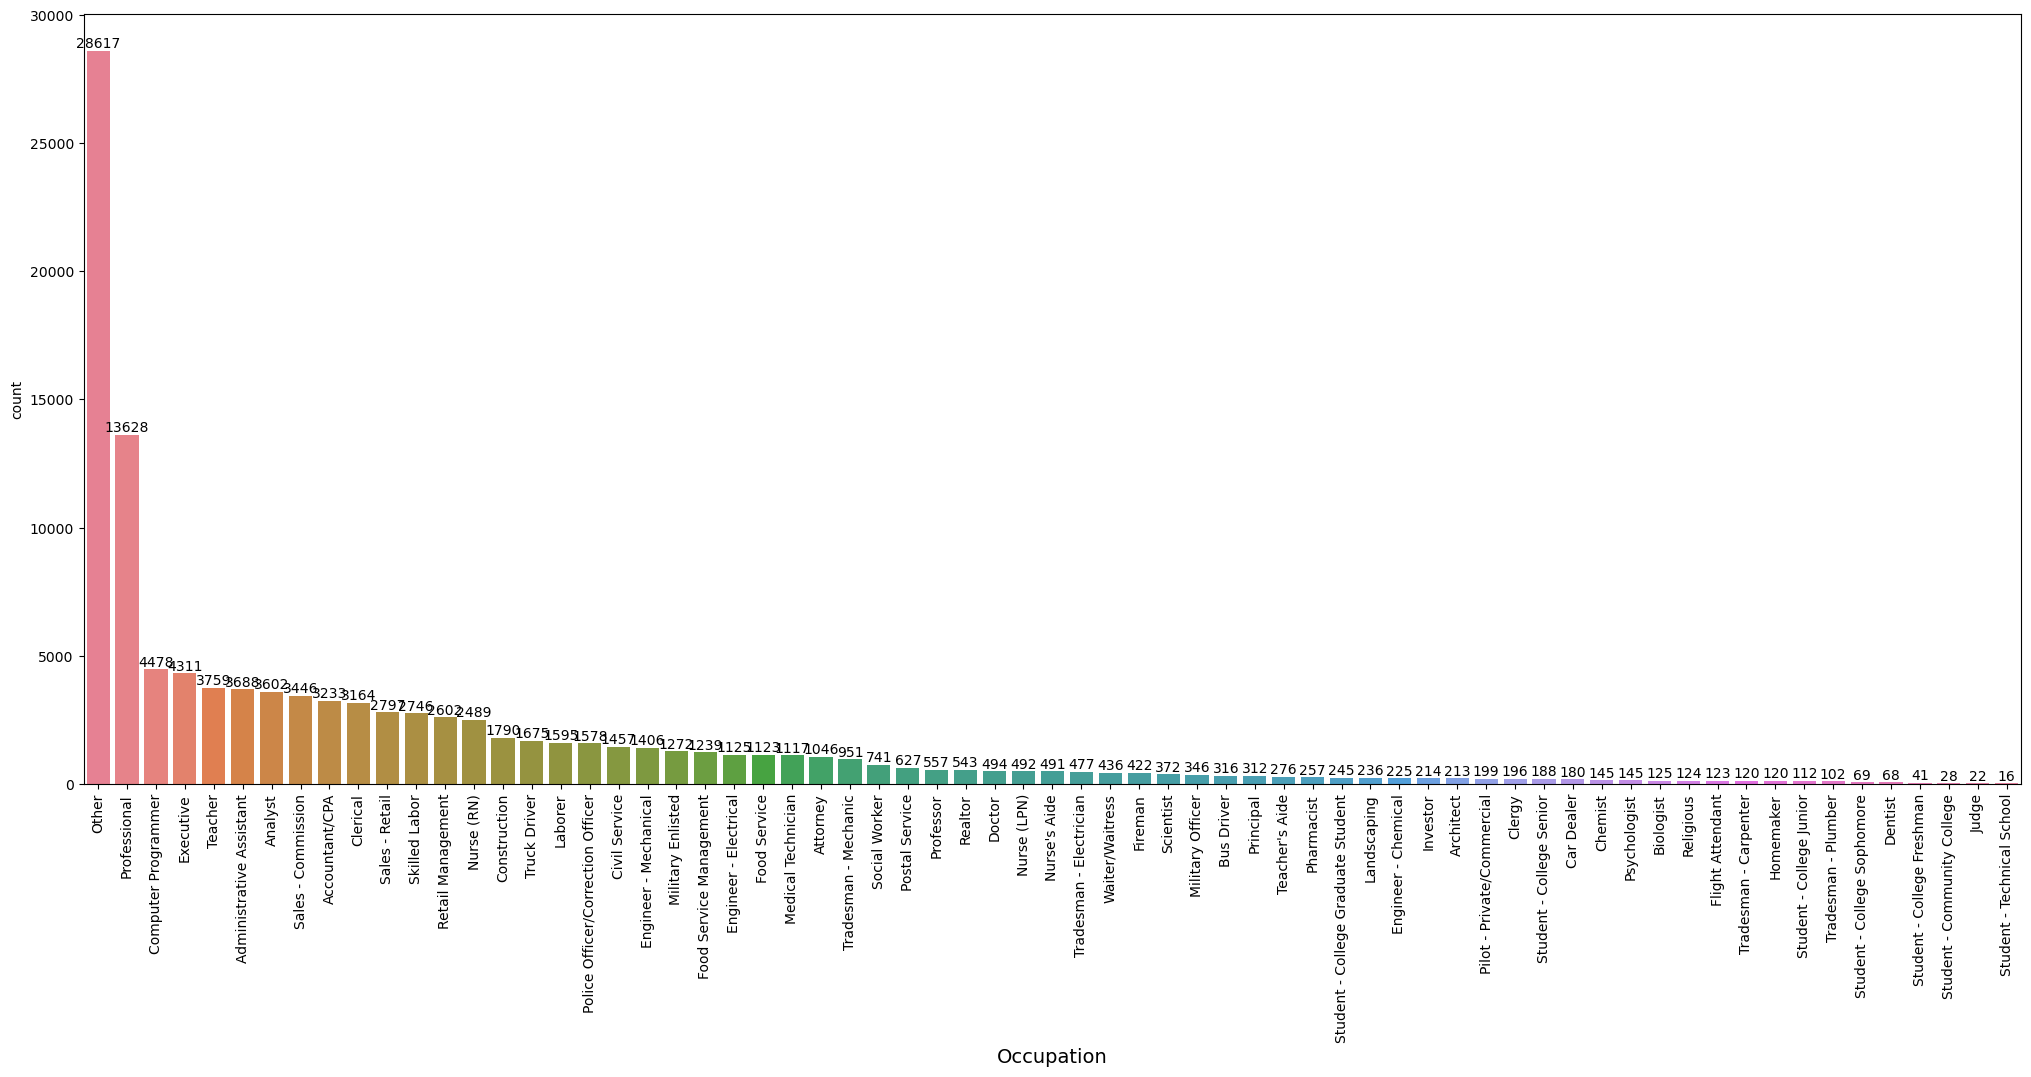

In [21]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='Occupation' ,order=data['Occupation'].value_counts().index,data=data,palette='husl')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- other and professionals are more high people <span style= "color:yellow"> 28617 & 13628 </span> 


C:\Users\oussa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

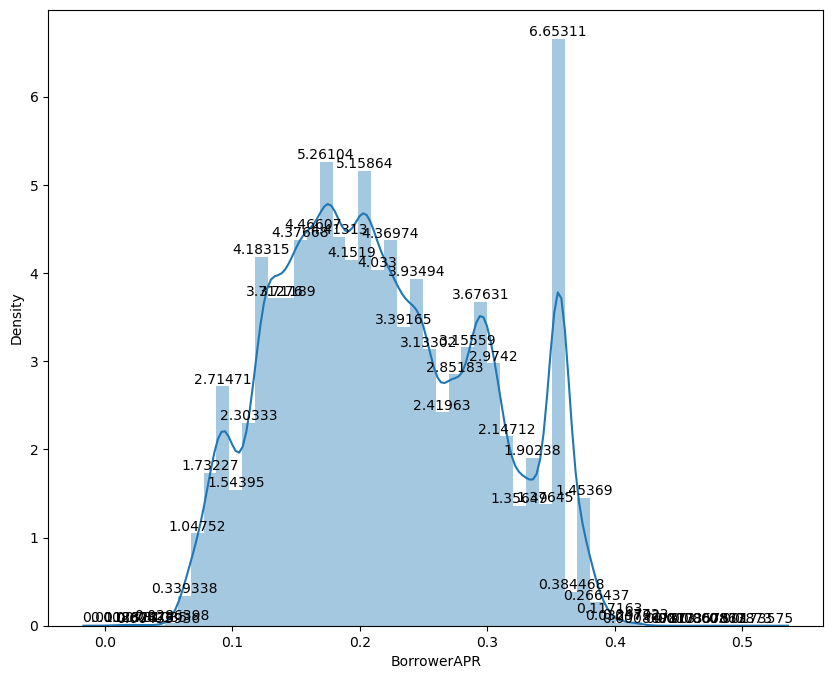

In [22]:
plt.figure(figsize=(10,8))
ax = sns.distplot(data['BorrowerAPR'])
for i in ax.containers:
    ax.bar_label(i,)
plt.show

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- It is Kind of Normal Distribution with Mesokurtic with outliers == This distribution is appearing mesokurtic overall but have outliers that significantly affect the tails.

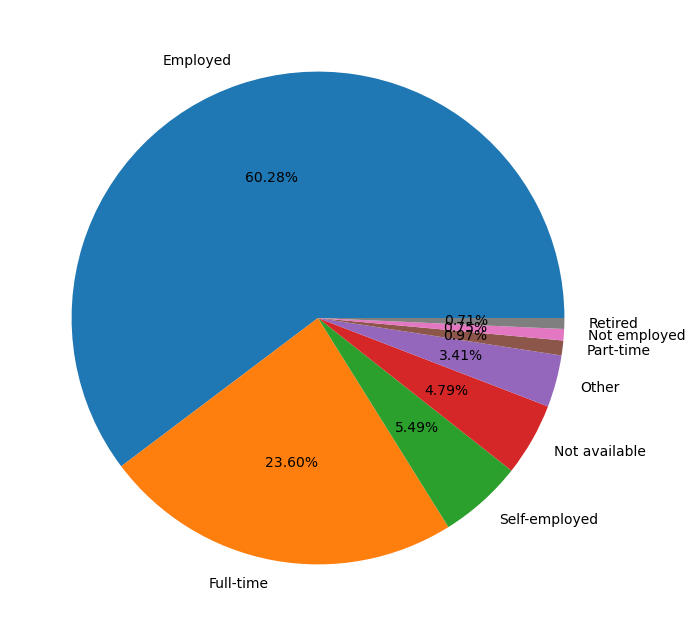

In [23]:
a = pd .DataFrame(data['EmploymentStatus'].value_counts())
plt.figure(figsize = (10,8))
plt.pie(a.EmploymentStatus,labels = a.index,autopct = '%.2f%%')
plt.show()


### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Employed people are more with <span style= "color:yellow"> 60.28% </span>
- Full-time working people are  with <span style= "color:yellow"> 23.60% </span>

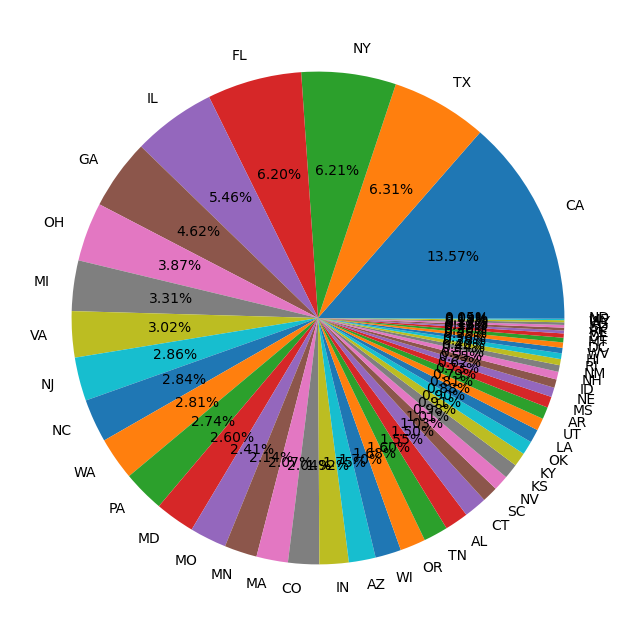

In [24]:
c = pd .DataFrame(data['BorrowerState'].value_counts())
plt.figure(figsize = (10,8))
plt.pie(c.BorrowerState,labels = c.index,autopct = '%.2f%%')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- CA (California) state is consuming / borrowing more loan with <span style= "color:yellow"> 17.76% </span>
- TX (Texas) state is next consuming more loan with <span style= "color:yellow"> 6.31% </span>

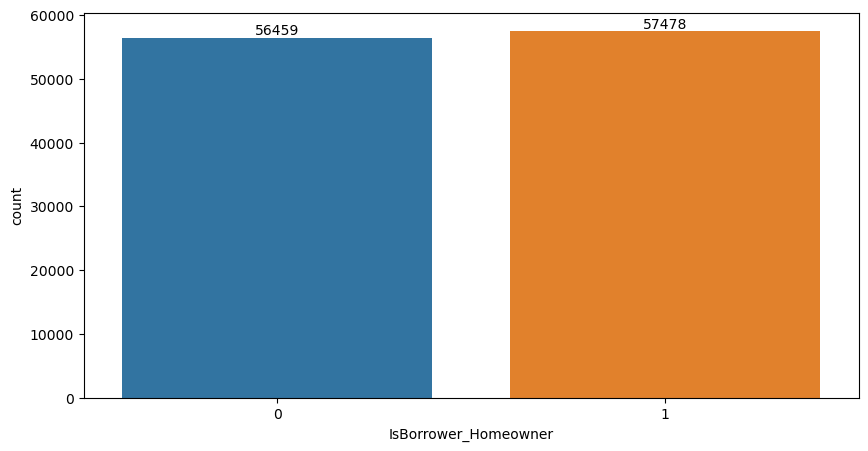

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='IsBorrower_Homeowner',data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The borrowers who are Homeowner and not an Homeowner are equally distributed with <span style= "color:yellow"> 57478 & 56459 </span>

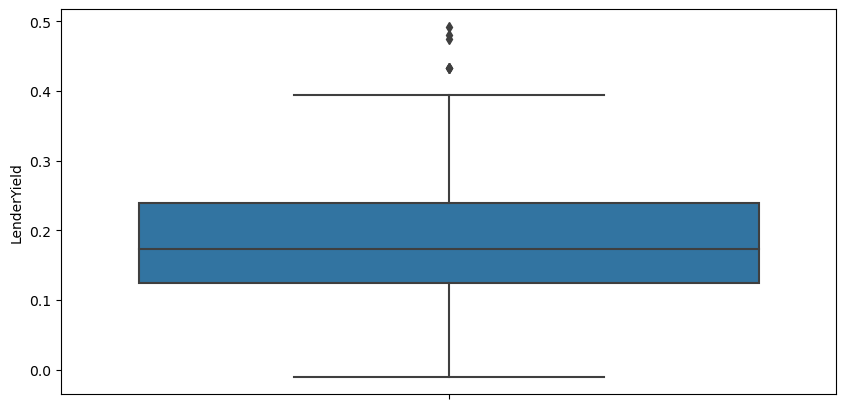

In [26]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='LenderYield',data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

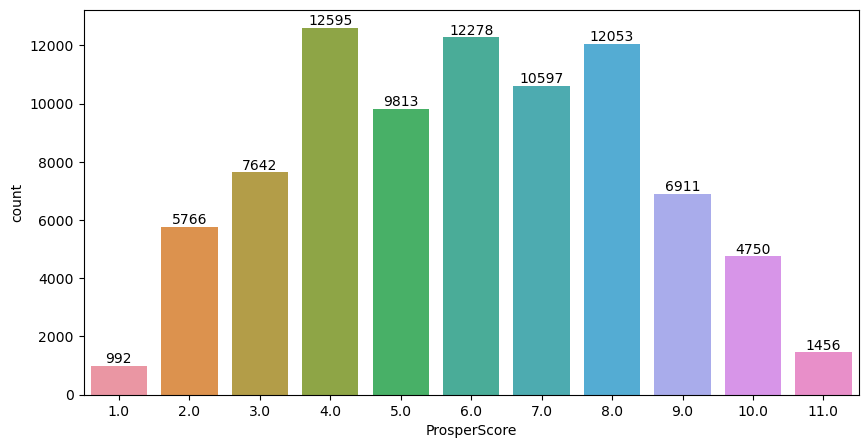

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='ProsperScore',data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

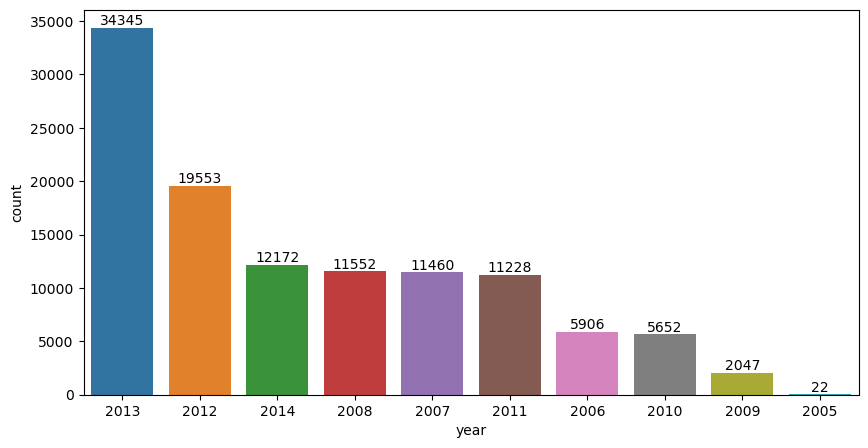

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='year',order=data['year'].value_counts().index, data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In the year 2013 more people taken loans with <span style= "color:yellow"> 34345 </span> members
- In the year 2012 also more people taken loans with <span style= "color:yellow"> 19553 </span> members
- In the year 2005 people taken least loans with <span style= "color:yellow"> 22 </span> members

### <span style="color:#E6E6FA; font-family: Georgia">Bivariate Analysis</span>

##### Numerical vs Numerical

<Figure size 1000x500 with 0 Axes>

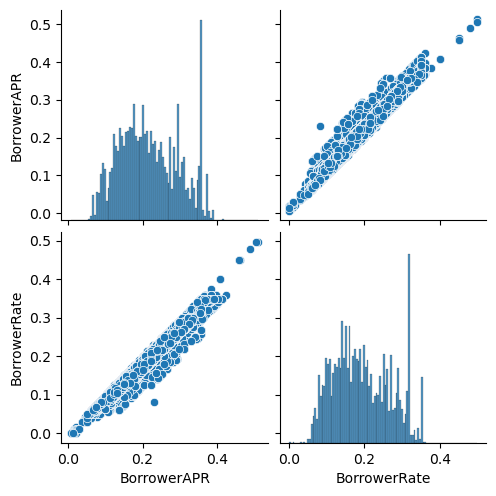

In [29]:
plt.figure(figsize = (10,5))
sns.pairplot(data = data, vars = ['BorrowerAPR','BorrowerRate'])
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- There is Linear Pattern between BorrowerRate and BorrowerAPR(Annual Percentage Rate)

<Figure size 1000x500 with 0 Axes>

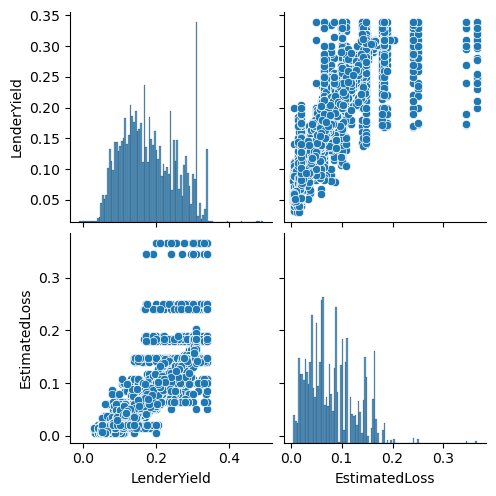

In [30]:
plt.figure(figsize = (10,5))
sns.pairplot(data = data, vars = ['LenderYield','EstimatedLoss'])
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- There is slight Linear Pattern between 'LenderYield','EstimatedLoss'

<Figure size 1000x500 with 0 Axes>

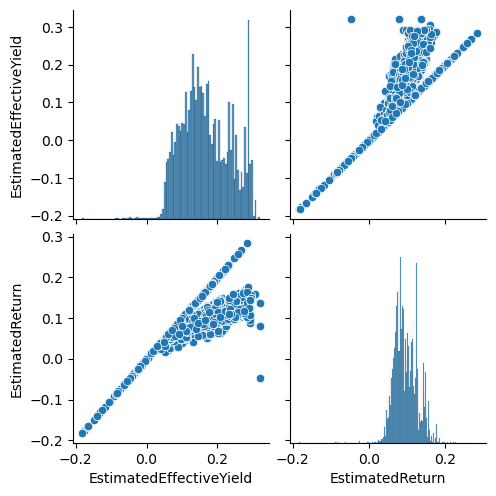

In [31]:
plt.figure(figsize = (10,5))
sns.pairplot(data = data, vars = ['EstimatedEffectiveYield','EstimatedReturn'])
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- There is Linear Pattern between EstimatedReturn and EstimatedEffectiveYield

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='Investors'>

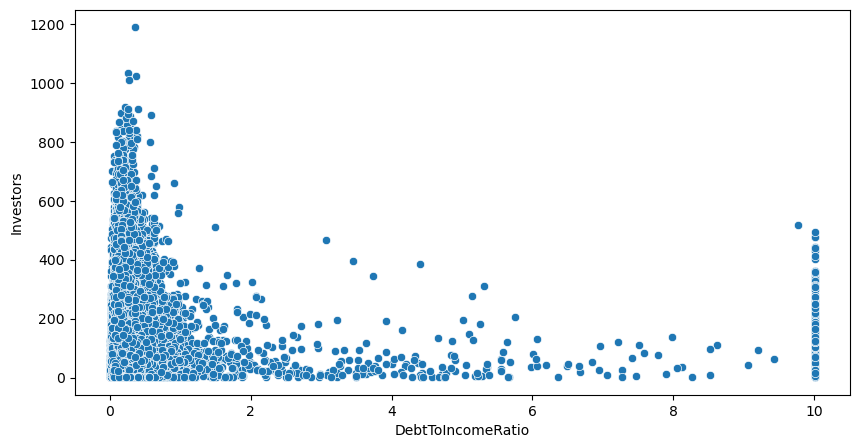

In [32]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='DebtToIncomeRatio',y='Investors')

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The scatter plot explains how investors mostly invest in the range of the people with debt to income ratio of 0-25%. 
- Certain investors can be found investing in the range of 25-70% but the number of investors is really less compared to those investing for the previous range.
- A decent amount of investors are investing in the debt to income ratio of 10.

<AxesSubplot:xlabel='ProsperScore', ylabel='LoanOriginalAmount'>

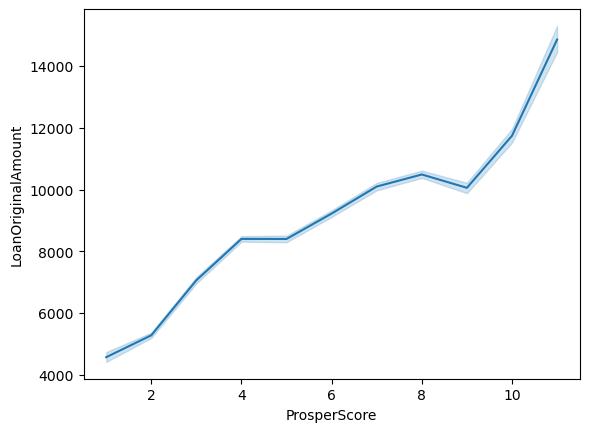

In [33]:
sns.lineplot(x = "ProsperScore",y = "LoanOriginalAmount",data = data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Lineplot we can show that as propser score increases the loan original amount increases

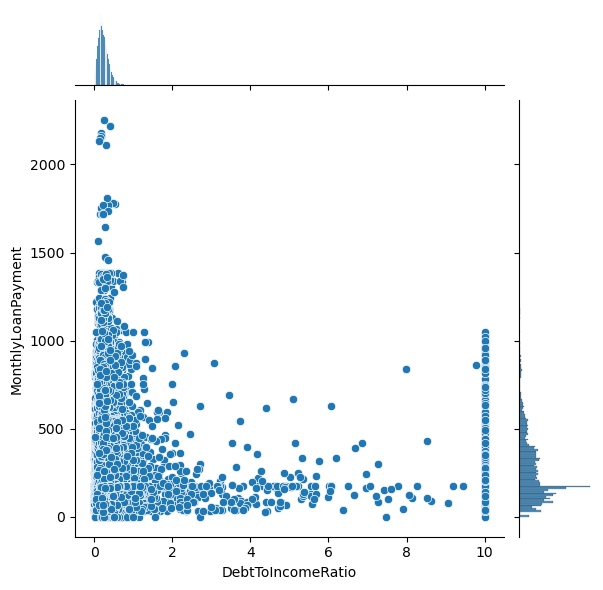

In [34]:
sns.jointplot(x = "DebtToIncomeRatio",y = "MonthlyLoanPayment",data = data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The scatter plot stats that the monthly loan payments is highest at 0-20%.
- Also there is decent amount of monthly payers at 100%

<AxesSubplot:xlabel='ProsperScore', ylabel='ListingCategory (numeric)'>

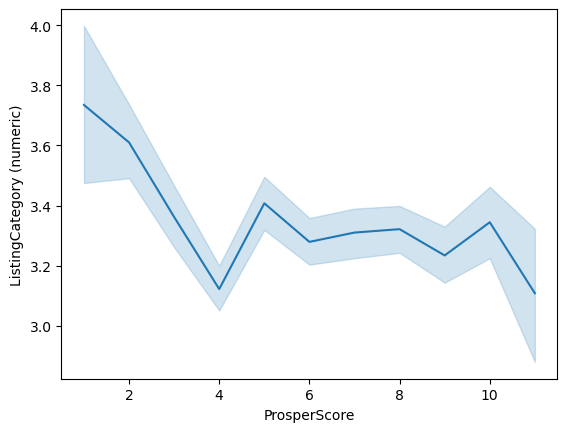

In [35]:
sns.lineplot(x="ProsperScore",y = "ListingCategory (numeric)",data = data)

<AxesSubplot:xlabel='ProsperScore', ylabel='DebtToIncomeRatio'>

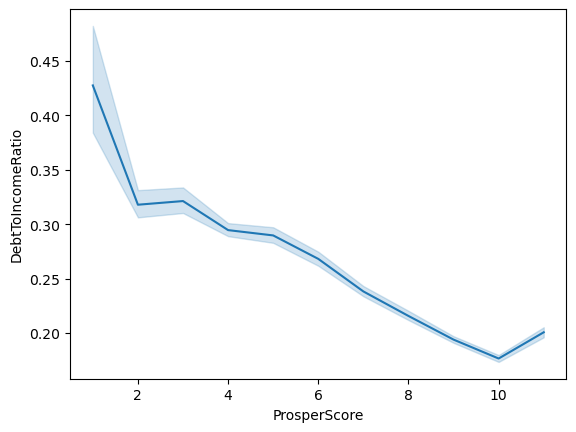

In [36]:
sns.lineplot(x = "ProsperScore",y = "DebtToIncomeRatio",data = data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Lineplot we can show that as propser score increases the DebtToIncomeRatio is decreases and vice-versa

#### Categorical vs Numerical

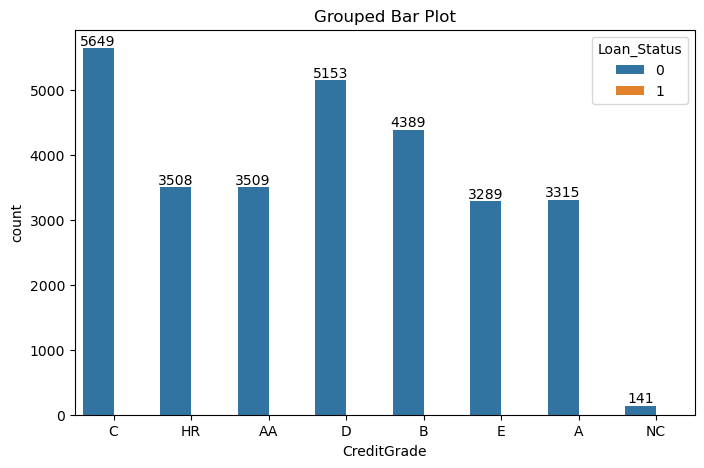

In [37]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='CreditGrade', hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Grouped Bar Plot')
plt.show()

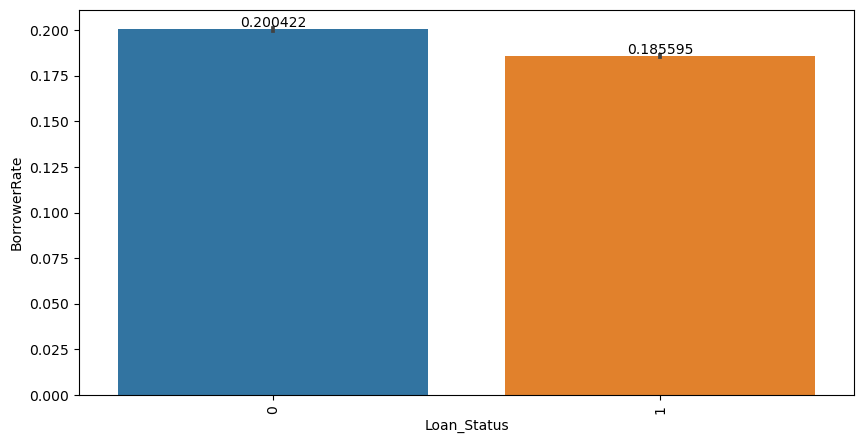

In [38]:
plt.figure(figsize=(10,5))
ls = sns.barplot(data = data, x = 'Loan_Status',y = 'BorrowerRate')
for i in ls.containers:
    ls.bar_label(i,)
plt.xticks(rotation = 90)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The Loan status (yes or 1) states that it having high borrower rate and vice-versa

##### Changing the data

In [39]:
# replace NC and HR with E
data['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)
# Replace 'Not employed' with '$0'
data['IncomeRange'] = data['IncomeRange'].replace('Not employed', '$0')

# Replace 'Not displayed' with '$0'
data['IncomeRange'] = data['IncomeRange'].replace('Not displayed', '$0')

# Convert the column to categorical
data['IncomeRange'] = pd.Categorical(data['IncomeRange'], categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+'], ordered=True)
print(data['IncomeRange'].value_counts())

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64


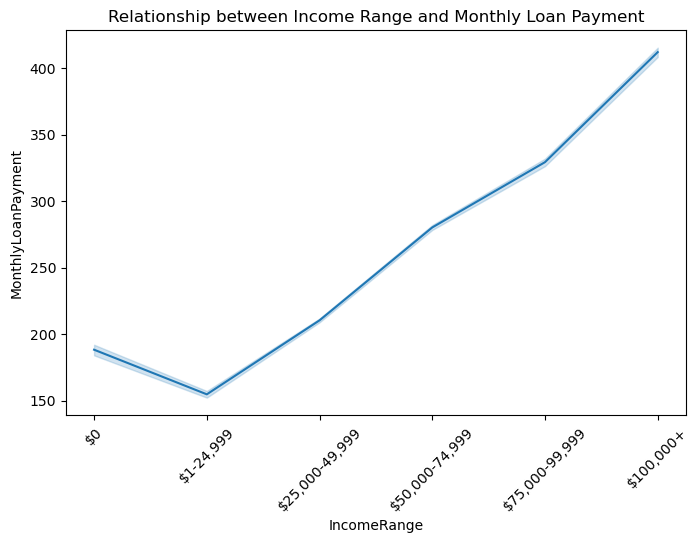

In [40]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=data, x="IncomeRange", y="MonthlyLoanPayment")
plt.title('Relationship between Income Range and Monthly Loan Payment')
plt.xticks(rotation=45)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The line plot illustrates a distinct pattern in the relationship between Income Range and Monthly Loan Payment. 
- Notably, there is a sharp decline in Monthly Loan Payments for the income range of $1-24,999, 
- Followed by a subsequent upward trend as Monthly Loan Payments increase across higher income ranges.

Text(0.5, 1.0, 'Relationship between Prosper Score and Borrower Rate')

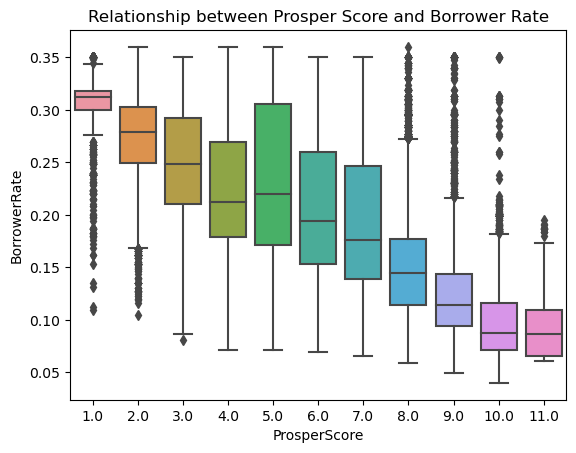

In [41]:
sns.boxplot(data=data,x='ProsperScore',y='BorrowerRate')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.title('Relationship between Prosper Score and Borrower Rate')

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Prosper score of <span style="color:yellow">1.0,9.0,10.0,8.0,2,0</span> are having high outliers.
- The Interquartile Ranges is also vary from each prosper score.

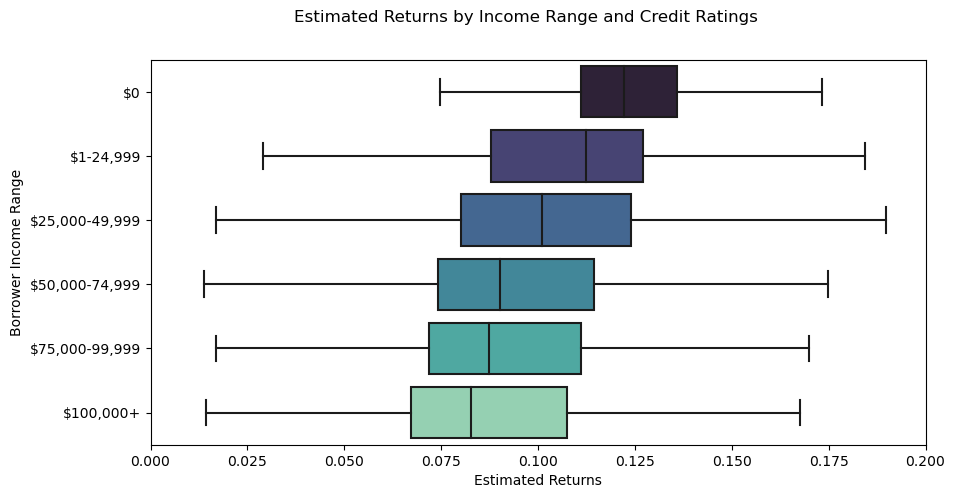

In [42]:
# boxplots
plt.figure(figsize = [10, 5])
sns.boxplot(data = data,  x = 'EstimatedReturn', y= 'IncomeRange', palette = "mako", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Income Range')
plt.xlabel('Estimated Returns')
plt.suptitle('Estimated Returns by Income Range and Credit Ratings');

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- We are able to witness that as borrower income range increases, the median for the rate of estimated returns is decreasing. 
- As a result, we can conclude that as the borrower has a higher income range, he/she has more probability to repay the loan back.

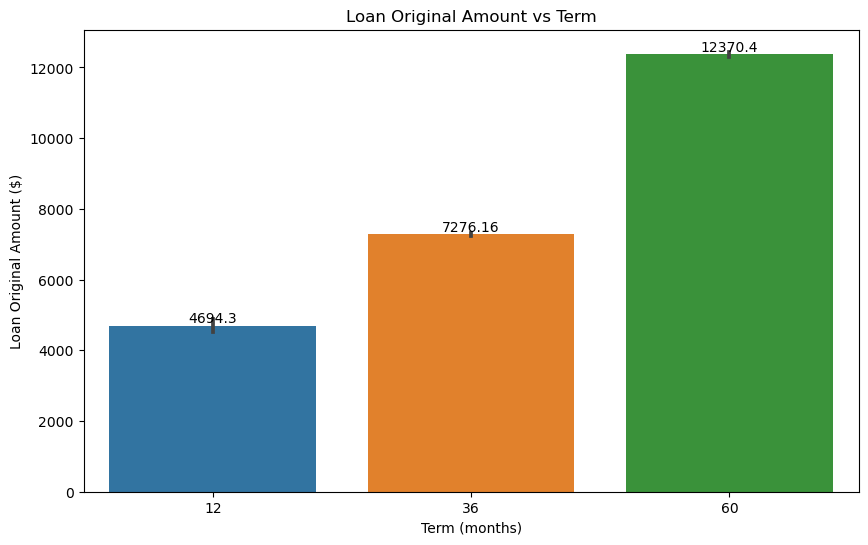

In [43]:
# Box plot for Loan Original Amount vs Term
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='Term', y='LoanOriginalAmount')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Loan Original Amount vs Term')
plt.xlabel('Term (months)')
plt.ylabel('Loan Original Amount ($)')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this plot it is clearly stating that loanoriginalamount is higher w.r.t tenure/term/months of loan repay.

Categorical vs Categorical

<AxesSubplot:xlabel='Occupation'>

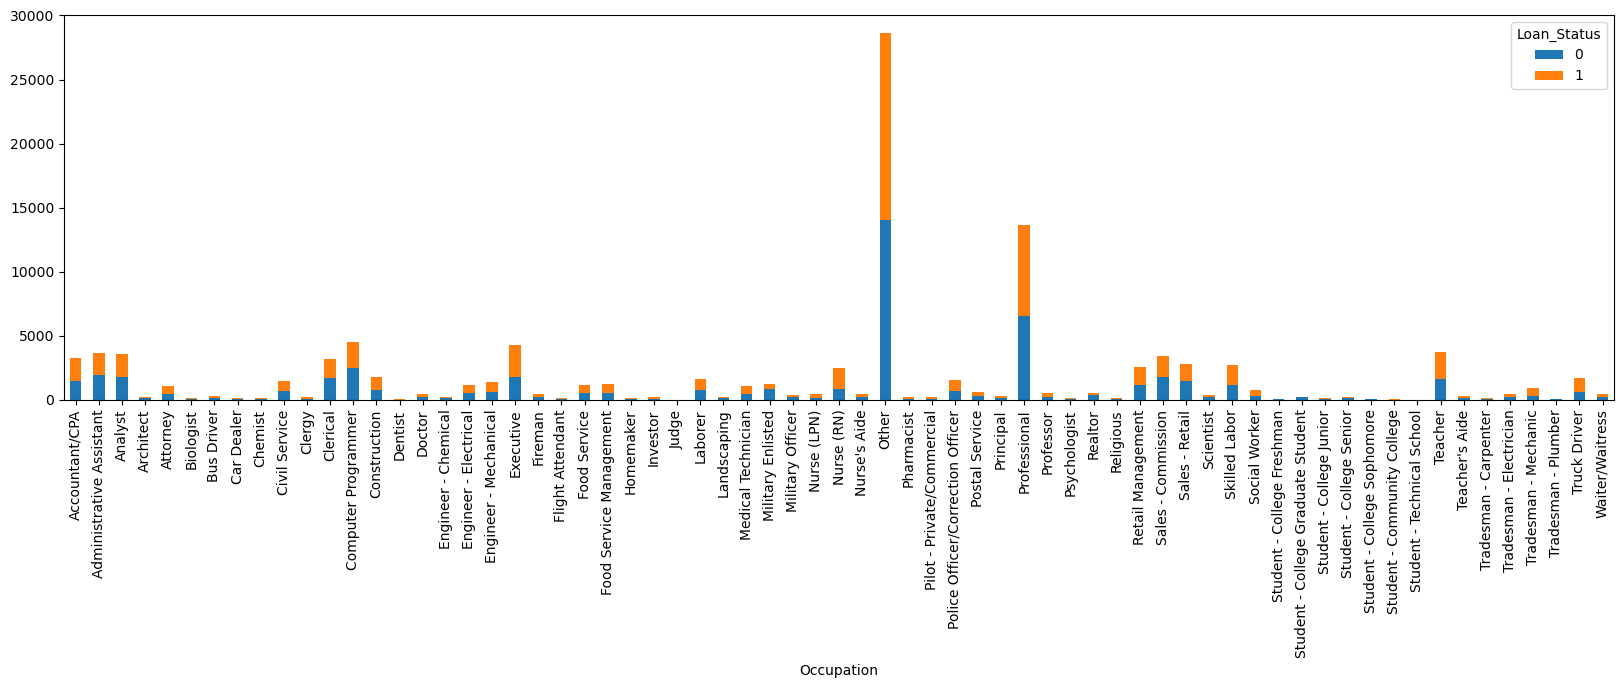

In [44]:
crosstab = pd.crosstab(data['Occupation'],data['Loan_Status'])
crosstab.plot(kind = 'bar',stacked = True,figsize=(20,5))

<AxesSubplot:xlabel='EmploymentStatus'>

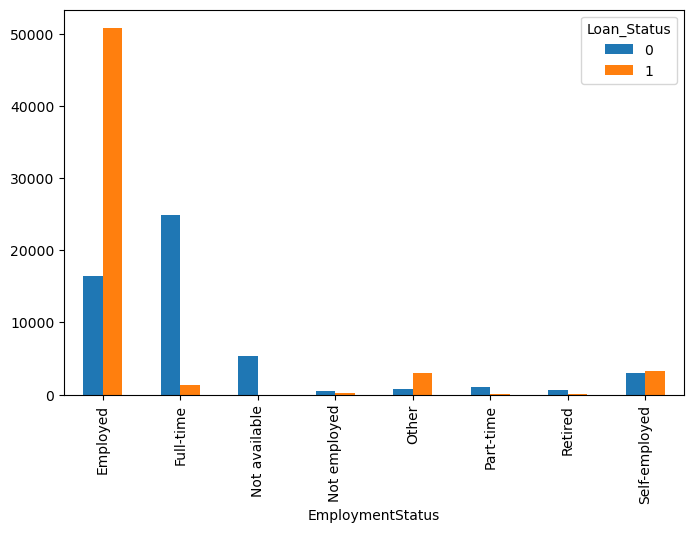

In [45]:
crosstab1 = pd.crosstab(data['EmploymentStatus'],data['Loan_Status'])
crosstab1.plot(kind = 'bar',stacked = False,figsize=(8,5))

### <span style="color:#E6E6FA; font-family: Georgia">Multivariate Analysis</span>

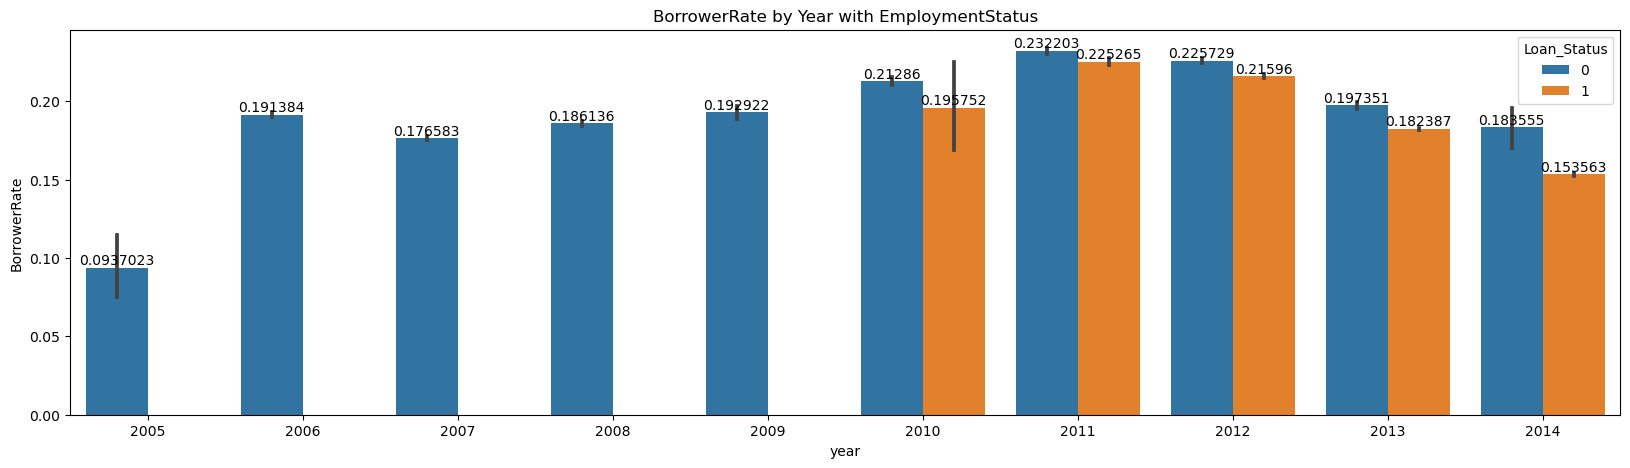

In [46]:
plt.figure(figsize = (20,5))
ax = sns.barplot(x = 'year',y = 'BorrowerRate',hue = 'Loan_Status', data = data )
for i in ax.containers:
    ax.bar_label(i,)
plt.title('BorrowerRate by Year with EmploymentStatus')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Borrower Rate will no Repayment is noticed high in 2011 also Borrower Rate with Repayment also noticed in 2011

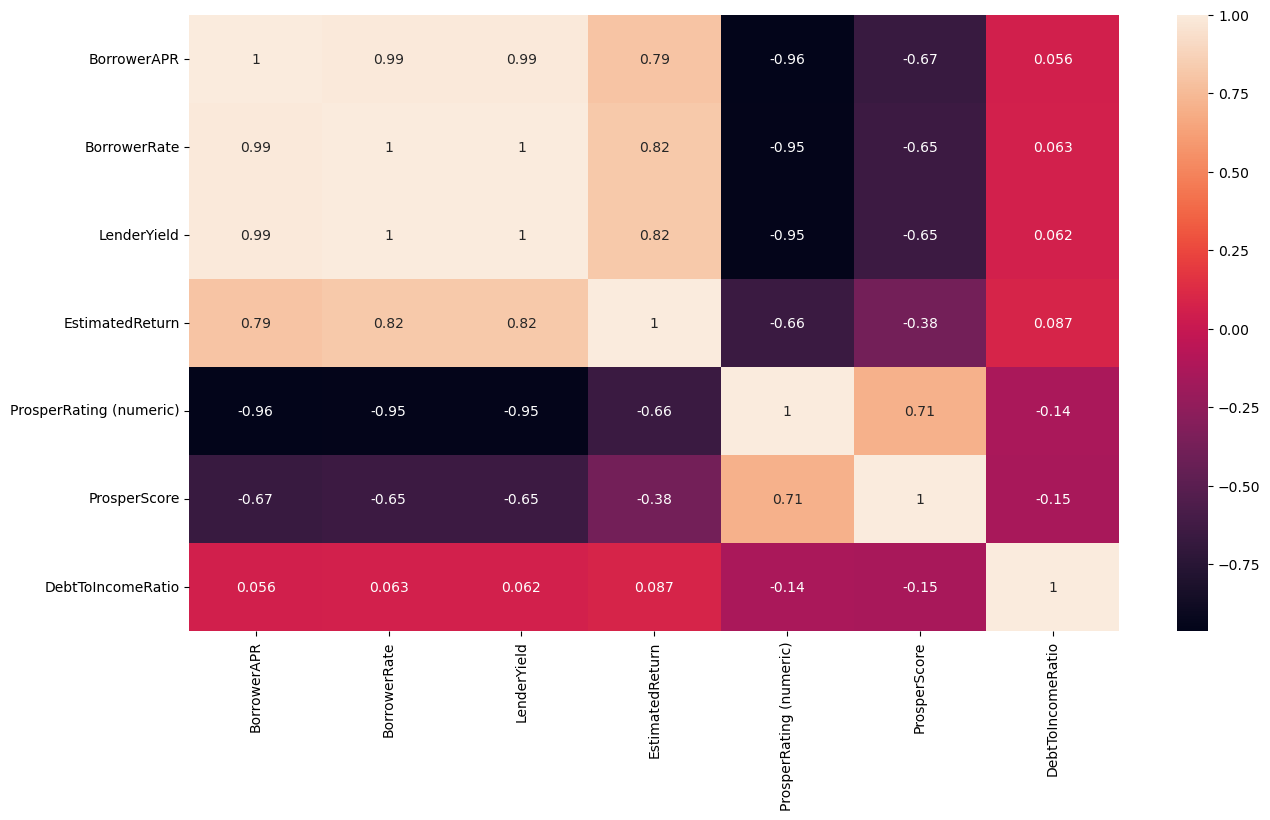

In [47]:
plt.figure(figsize = (15,8))
sns.heatmap(data[['BorrowerAPR','BorrowerRate','LenderYield','EstimatedReturn','ProsperRating (numeric)','ProsperScore','DebtToIncomeRatio']].corr(),annot = True)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Heat map it explains that BorrowerAPR, BorrowerRate and the LenderYield having high correlation of 0.99 and in the feature we can take only one column instead of all.
- Estimated Return w.r.t BorrowerAPR, BorrowerRate and the LenderYield  are also giving positive correlation with 0.79,0.82,0.82
- ProsperScore, ProsperRating(numeric) having a positive correlation of 0.71

In [48]:
data["IncomeRange"] = data["IncomeRange"].astype("object")

# <span style="color:#E6E6FA; font-family: Georgia">OUTLIERS TREATMENT</span>

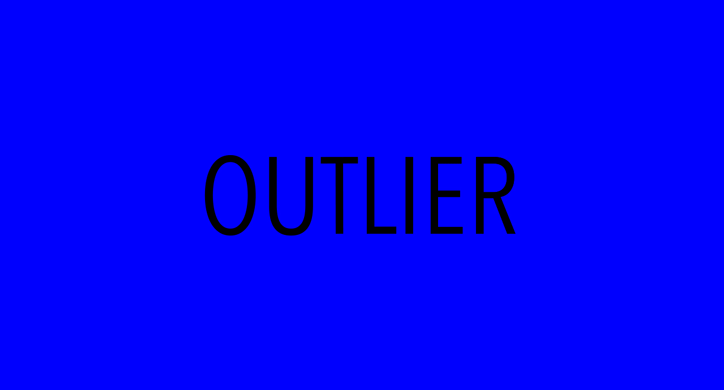

#### Identifying outliers using z-score

In [49]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    z_scores = stats.zscore(data[column])
    outliers = (z_scores > 3) | (z_scores < -3)
    outlier_values = data[column][outliers]
    # Process or visualize outlier_values as needed
outlier_values


Series([], Name: year, dtype: int64)

### Removing the outliers

In [50]:
# Assuming 'data' is your original dataset containing numerical, categorical, and datetime columns

# Filter outliers from numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
filtered_numerical_data = pd.DataFrame()
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[~((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))]
    filtered_numerical_data[column] = filtered_data[column]

# Merge filtered numerical data with categorical and datetime columns
categorical_columns = data.select_dtypes(include='object').columns
datetime_columns = data.select_dtypes(include='datetime64').columns
boolean_columns = data.select_dtypes(include='bool').columns

out_data = pd.concat([filtered_numerical_data, data[categorical_columns], data[datetime_columns],data[boolean_columns]], axis=1)

# <span style="color:#E6E6FA; font-family: Georgia">NULL VALUES TREATMENT</span>

In [51]:
 #handling null for numerical columns
num_col = out_data.select_dtypes(include=['int64','float64'])
imputer = SimpleImputer(strategy='mean')
df_num_imp = pd.DataFrame(imputer.fit_transform(num_col), columns = num_col.columns)

#handling null for categorical columns
cat_col = out_data.select_dtypes(include=['object'])
imputer = SimpleImputer(strategy= 'most_frequent')
df_cat_imp = pd.DataFrame(imputer.fit_transform(cat_col), columns = cat_col.columns)

#### - we cannot do the ffill or interpolate to the date time column which it was not linear which means it is not following any sequence.
#### - Also it is depend on the loan status if its completed then it has a closed date other wise it wont have so in such case we cannot pass any kind of imputing.

In [52]:
# Concating the columns
tgt_data = data['Loan_Status']
final_data = pd.concat([df_num_imp,df_cat_imp,data_bool,tgt_data],axis = 1)

In [53]:
final_data.shape

(113937, 77)

In [54]:
final_data.IsBorrowerHomeowner

0          True
1         False
2         False
3          True
4          True
          ...  
113932     True
113933     True
113934     True
113935     True
113936    False
Name: IsBorrowerHomeowner, Length: 113937, dtype: bool

# <span style="color:lightgreen; font-family: Lucida Console">EXPLORATORY    DATA    ANALYSIS</span>

### <span style="color:lightgreen; font-family: Lucida Console">After handling Outliers and null</span>

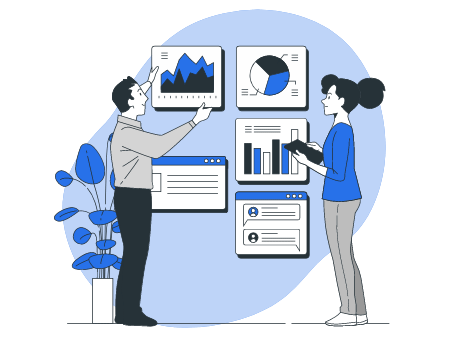

### <span style="color:#E6E6FA; font-family: Georgia">Univariate Analysis</span>

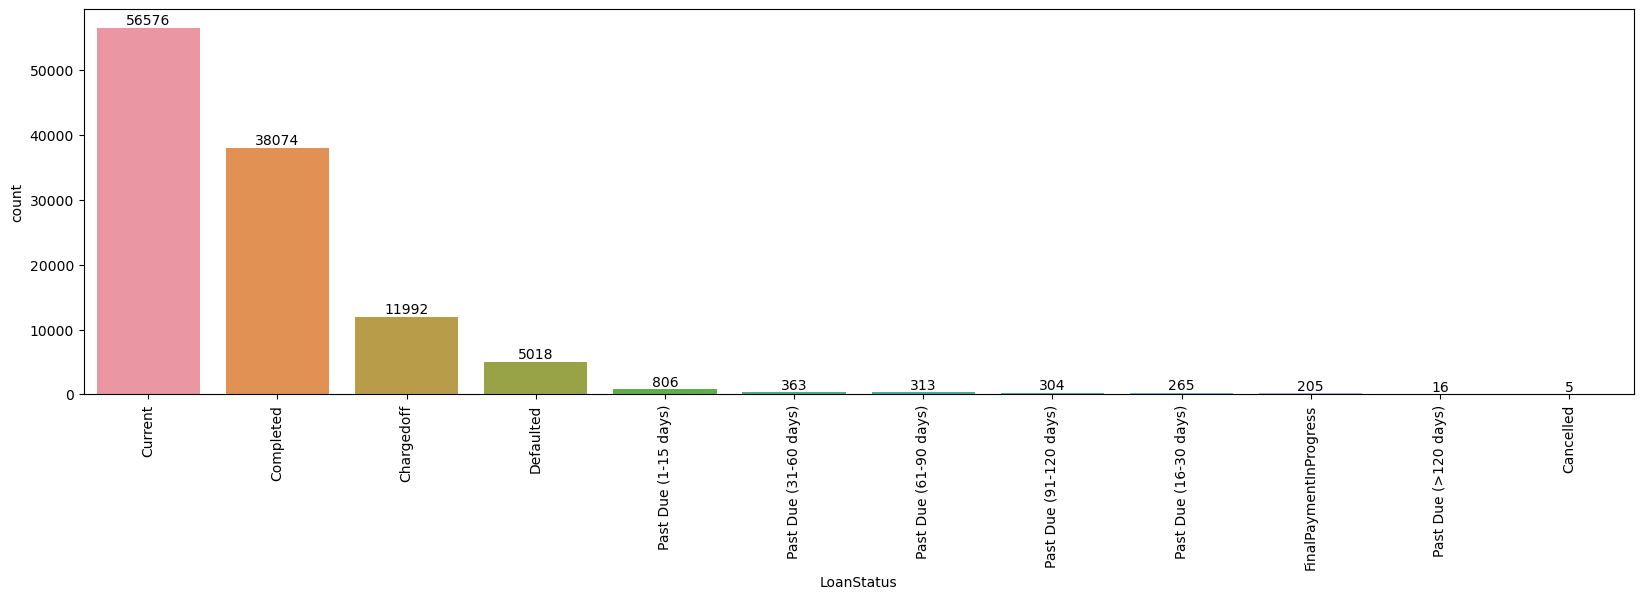

In [55]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x = 'LoanStatus',order=data['LoanStatus'].value_counts().index,data = final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this We observed that we have more Current loans with <span style= "color:yellow">  56576</span>, such that loans are more in open state than the completed loans are <span style= "color:yellow">  38074 </span>
- There are less cancelled loans with <span style= "color:yellow">  5 </span> and past due loans are with <span style= "color:yellow"> 806+265+313+363+304+16 = 2067</span>  and that will be positive sign
- And people with final payments to done are <span style= "color:yellow">  205 </span>
- while the Chargedoff (lender's loss - a loan as unlikely to be collected is) with   <span style= "color:yellow"> 11992 </span>
- while defaulted is (when the borrower misses payments or fails to fulfill other obligations specified in the loan agreement) and with <span style= "color:yellow"> 5018 </span>

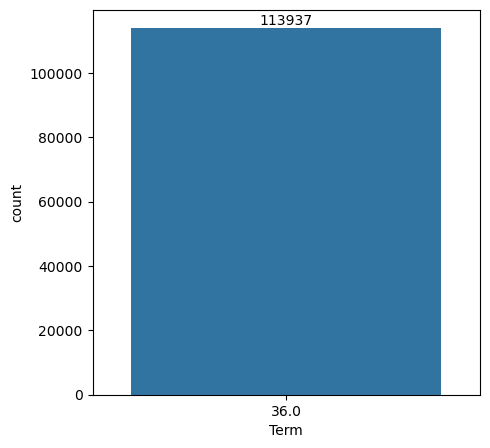

In [56]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'Term',data = final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- It is observed that More people are taking loans for <span style= "color:yellow"> 36 </span> months term are having loans 113937 loans

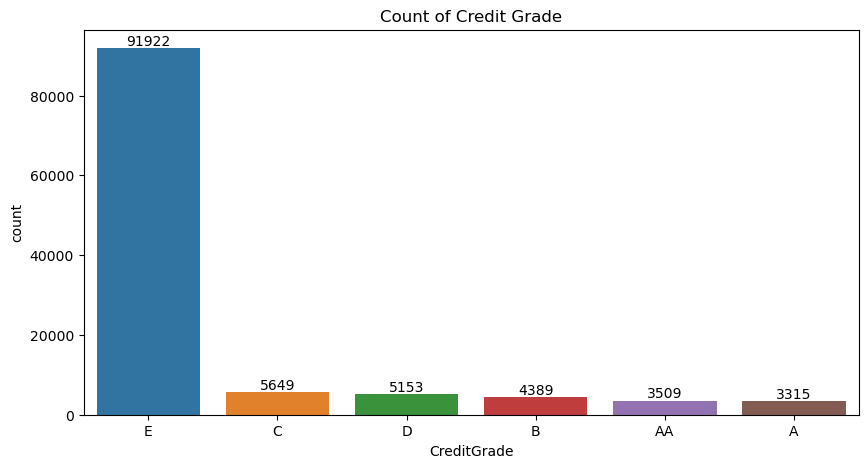

In [57]:

plt.figure(figsize=(10,5))
ax = sns.countplot(x='CreditGrade',order=final_data['CreditGrade'].value_counts().index,data=final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count of Credit Grade')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- E (Below subprime)Creditgrade is with  <span style= "color:yellow"> 91922 </span> 
- C (fair or Average)Creditgrade is with high people <span style= "color:yellow"> 5649 </span> 
- D (sub prime)Creditgrade is with second highest people <span style= "color:yellow"> 5153 </span> 
- B (Good)Creditgrade is with third highest people <span style= "color:yellow"> 4389 </span> 
- AA (Higher credit quality than Prime)Creditgrade is with fourth highest people <span style= "color:yellow"> 3509 </span> 
- HR (High-Risk)Creditgrade is with <span style= "color:yellow"> 3508 </span> 
- A (Prime)Creditgrade is with <span style= "color:yellow"> 3315 </span>

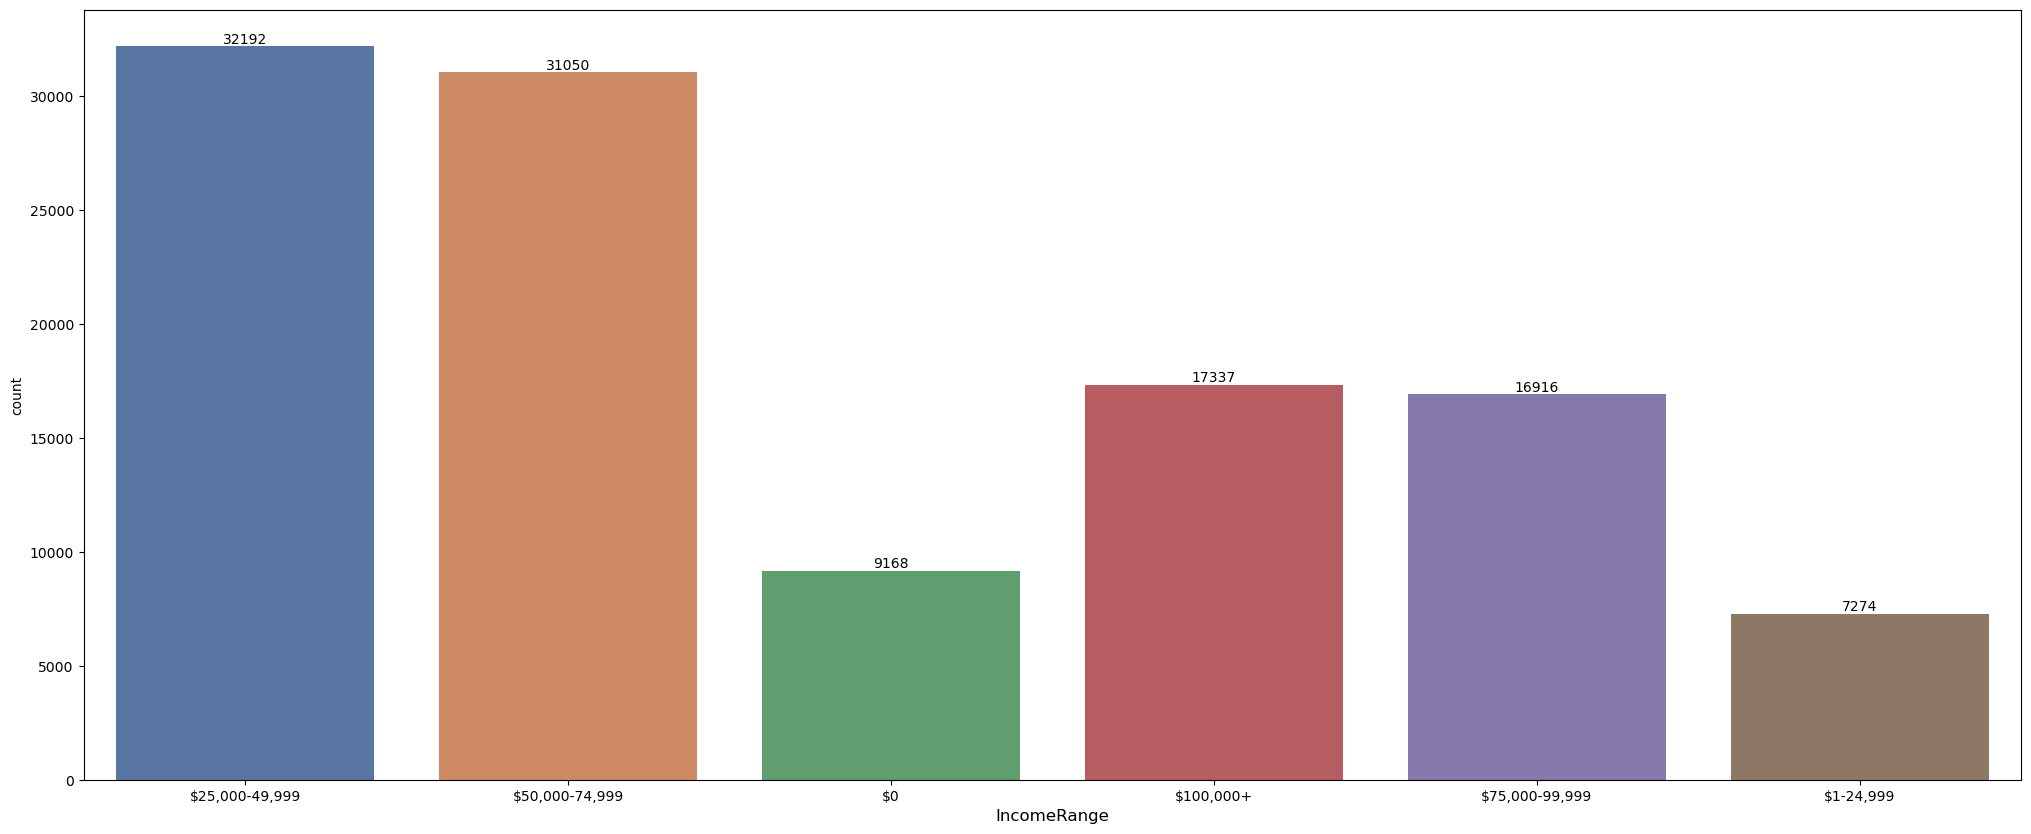

In [58]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='IncomeRange',data = final_data ,palette= 'deep')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('IncomeRange', fontsize=12)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- $25,000-49,999 (Income-Range) is with high people <span style= "color:yellow"> 32192 </span> 
- $50,000-74,999 (Income-Range) is with second high people <span style= "color:yellow"> 31050 </span> 
- $100,000+ (Income-Range) is with third high people <span style= "color:yellow"> 17337 </span> 
- $75,000-99,999 (Income-Range) is with  <span style= "color:yellow"> 16916 </span> 
- $1-24,999 (Income-Range) is with  <span style= "color:yellow"> 7274 </span>
- $0 is with <span style= "color:yellow"> 9168 </span>

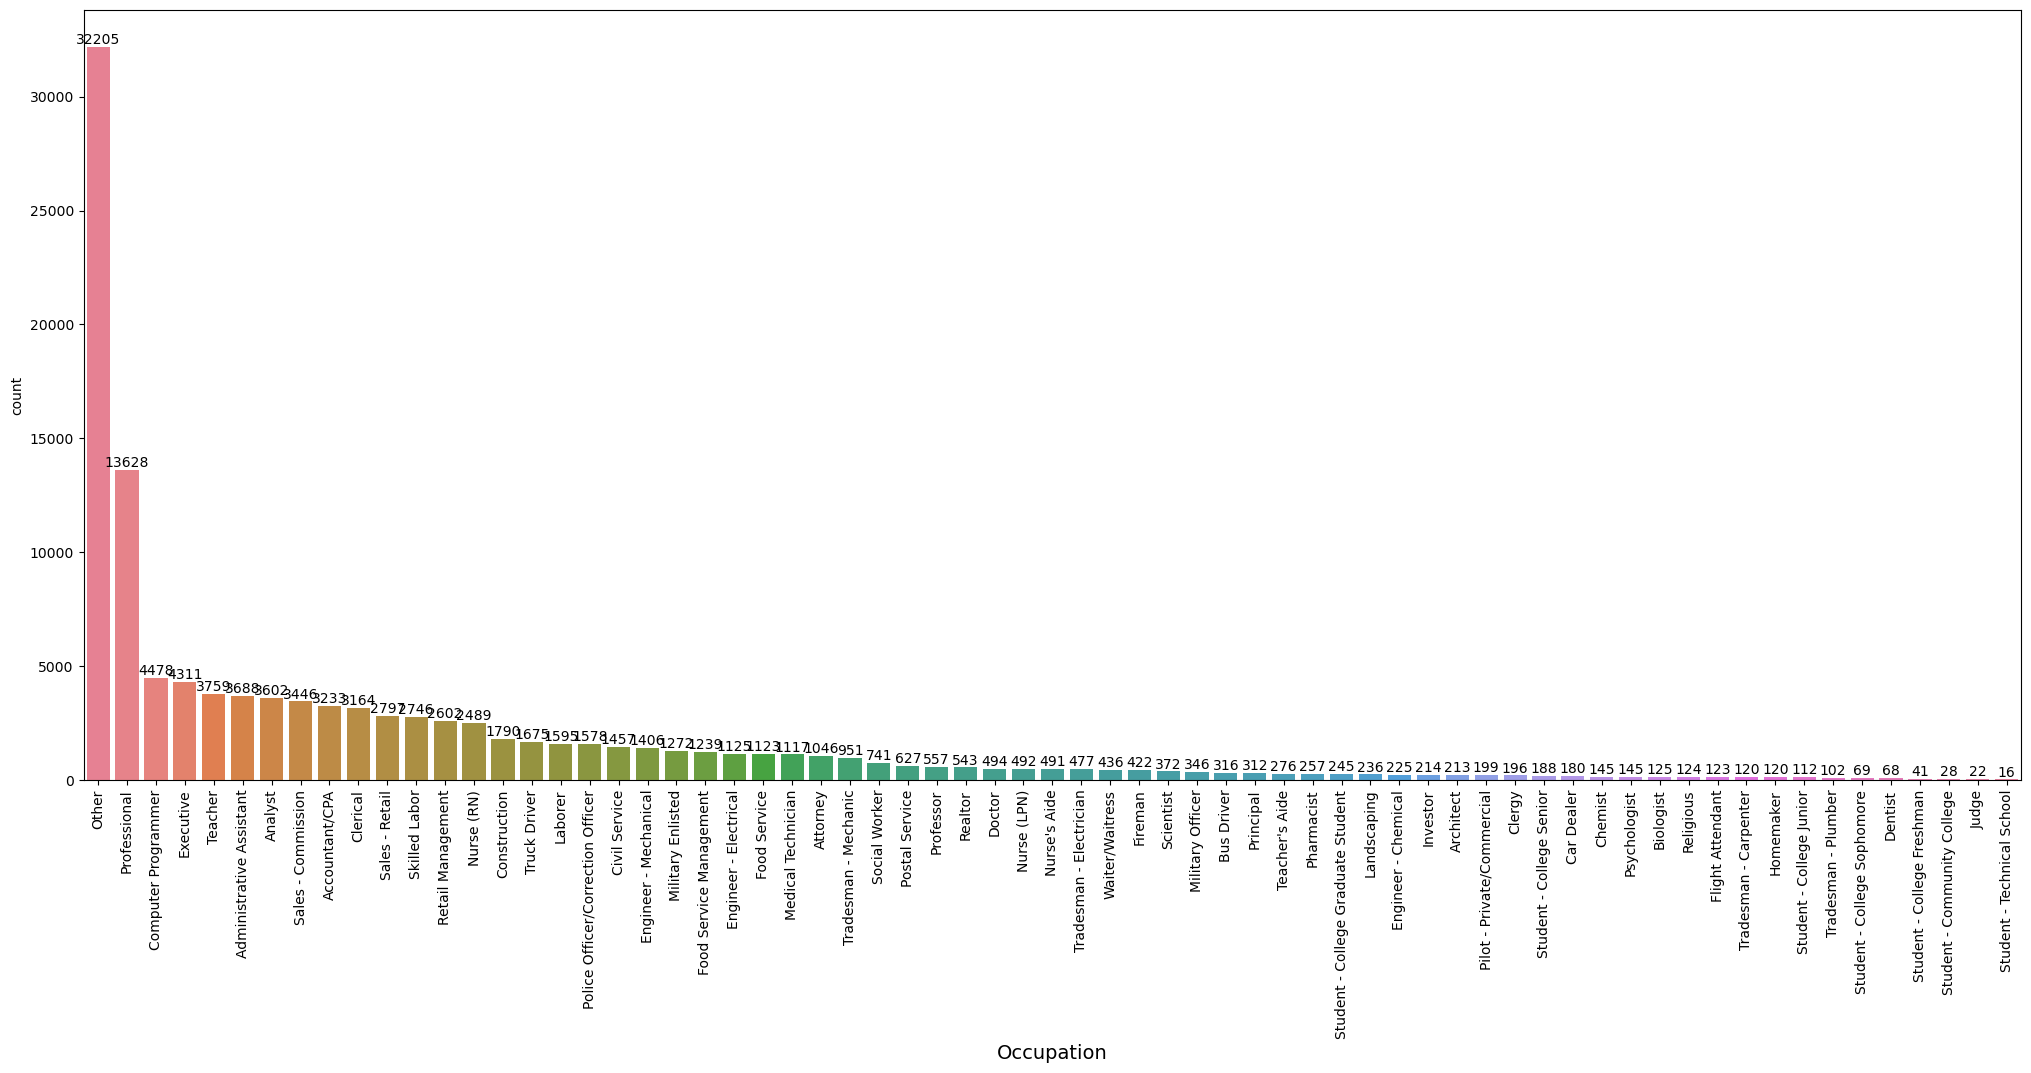

In [59]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='Occupation' ,order=final_data['Occupation'].value_counts().index,data=final_data,palette='husl')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- other and professionals are more high people <span style= "color:yellow"> 28617 & 13628 </span> 


C:\Users\oussa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

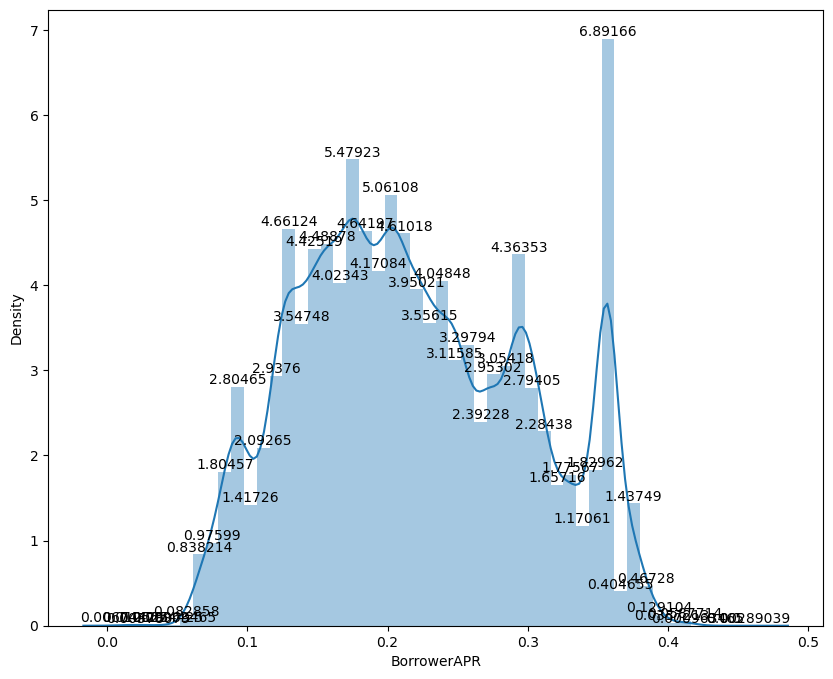

In [60]:
plt.figure(figsize=(10,8))
ax = sns.distplot(final_data['BorrowerAPR'])
for i in ax.containers:
    ax.bar_label(i,)
plt.show

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- It is Kind of Normal Distribution with Mesokurtic with outliers == This distribution is appearing mesokurtic only.

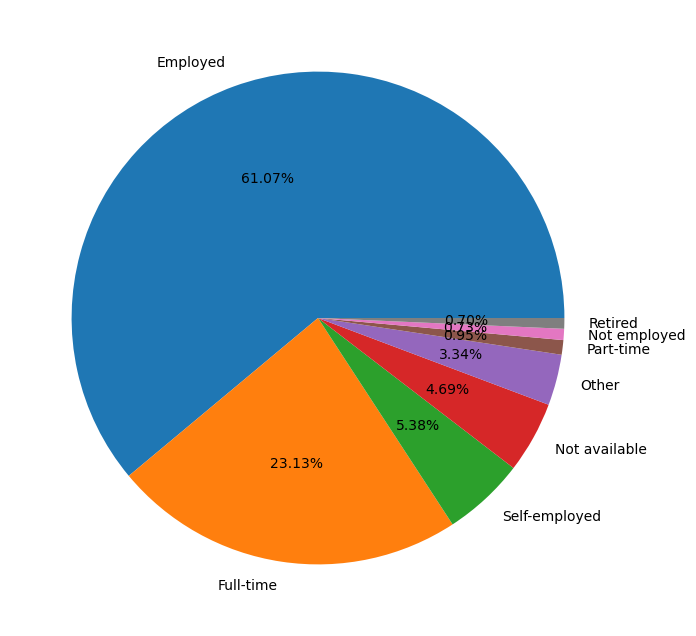

In [61]:
a = pd .DataFrame(final_data['EmploymentStatus'].value_counts())
plt.figure(figsize = (10,8))
plt.pie(a.EmploymentStatus,labels = a.index,autopct = '%.2f%%')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Employed people are more with <span style= "color:yellow"> 61.07% </span>
- Full-time working people are  with <span style= "color:yellow"> 23.13% </span>

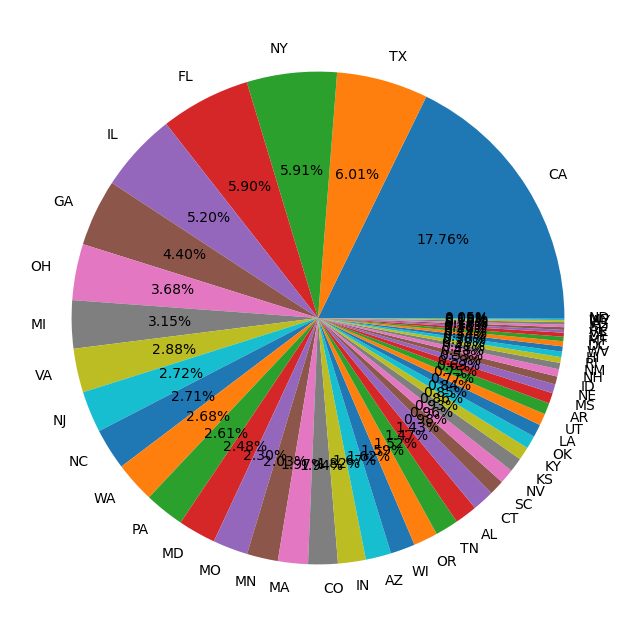

In [62]:
c = pd .DataFrame(final_data['BorrowerState'].value_counts())
plt.figure(figsize = (10,8))
plt.pie(c.BorrowerState,labels = c.index,autopct = '%.2f%%')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- CA (California) state is consuming / borrowing more loan with <span style= "color:yellow"> 17.76% </span>
- TX (Texas) state is next consuming more loan with <span style= "color:yellow"> 6.01% </span>

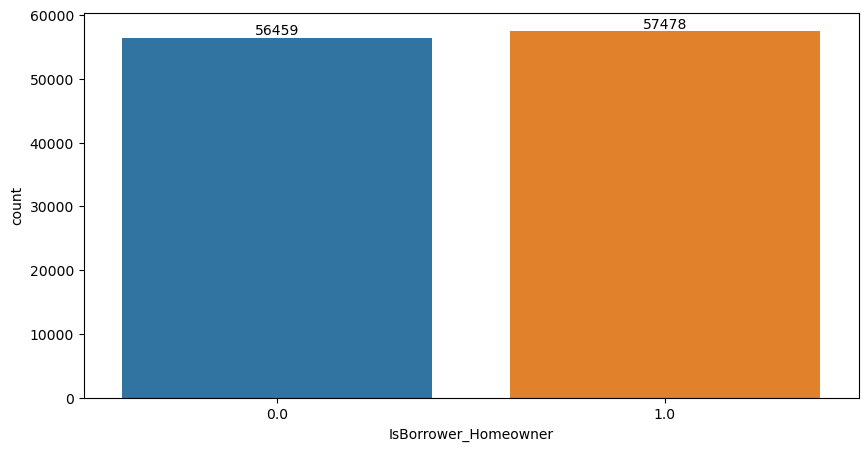

In [63]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x ='IsBorrower_Homeowner',data=final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The borrowers who are Homeowner and not an Homeowner are equally distributed with <span style= "color:yellow"> 57478 & 56459 </span>

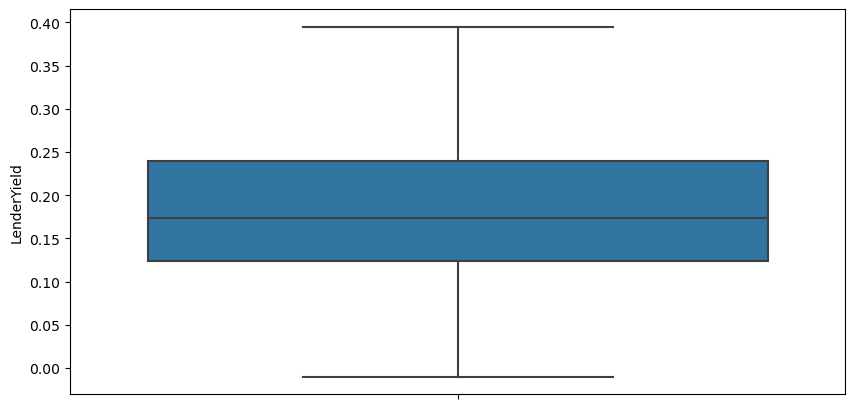

In [64]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='LenderYield',data=final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The Lender yield median is between <span style= "color:yellow"> 0.15 to 0.20  </span>

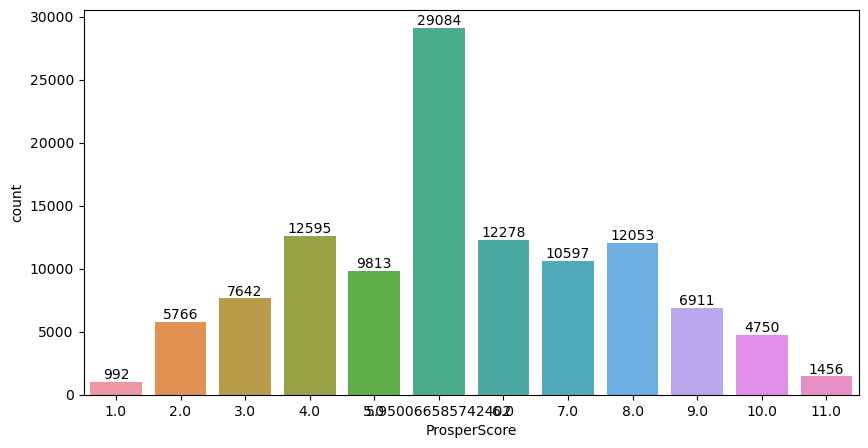

In [65]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='ProsperScore',data=final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- prosper score at 5.8 having  <span style= "color:yellow"> 29084 </span> members

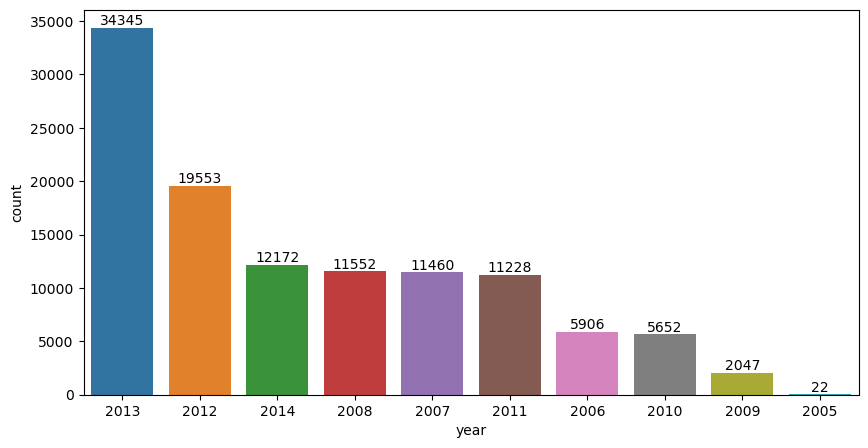

In [66]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='year',order=data['year'].value_counts().index, data=final_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In the year 2013 more people taken loans with <span style= "color:yellow"> 34345 </span> members
- In the year 2012 also more people taken loans with <span style= "color:yellow"> 19553 </span> members
- In the year 2005 people taken least loans with <span style= "color:yellow"> 22 </span> members

### <span style="color:#E6E6FA; font-family: Georgia">Bivariate Analysis</span>

##### Numerical vs Numerical

In [67]:
final_data.BorrowerRate

0         0.1580
1         0.0920
2         0.2750
3         0.0974
4         0.2085
           ...  
113932    0.1864
113933    0.1110
113934    0.2150
113935    0.2605
113936    0.1039
Name: BorrowerRate, Length: 113937, dtype: float64

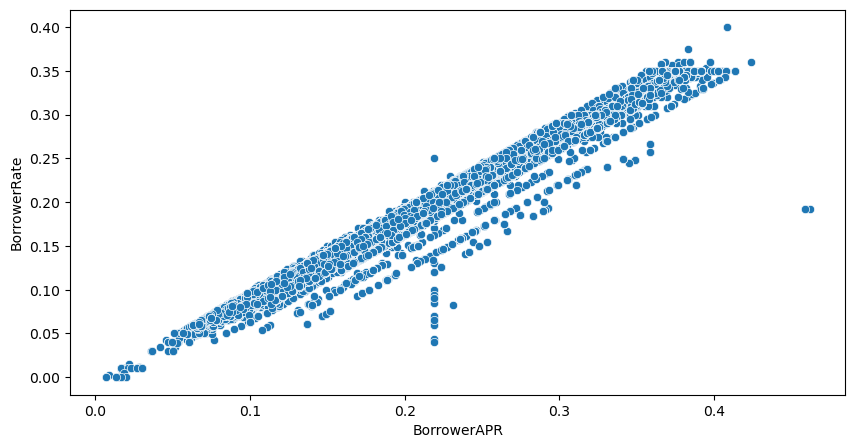

In [68]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'BorrowerAPR',y = 'BorrowerRate',data = final_data)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- There is Linear Pattern between BorrowerRate and BorrowerAPR(Annual Percentage Rate)

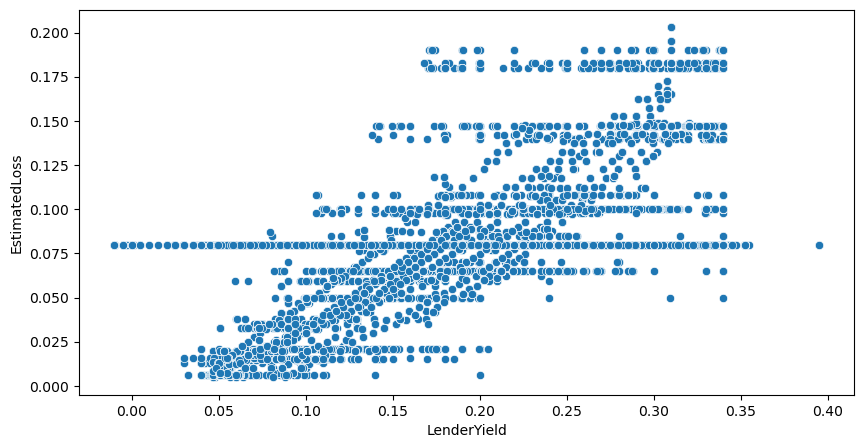

In [69]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = final_data, x = 'LenderYield',y = 'EstimatedLoss')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- There is slight Linear Pattern between 'LenderYield','EstimatedLoss'

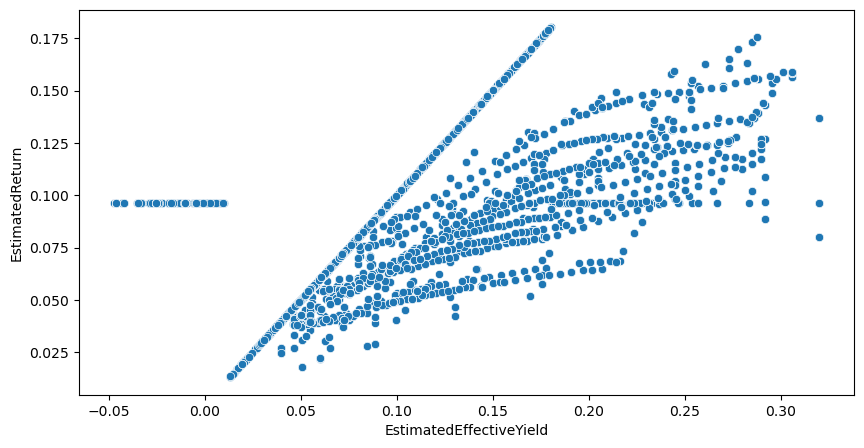

In [70]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'EstimatedEffectiveYield',y = 'EstimatedReturn',data = final_data)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- There is Linear Pattern between EstimatedReturn and EstimatedEffectiveYield

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='Investors'>

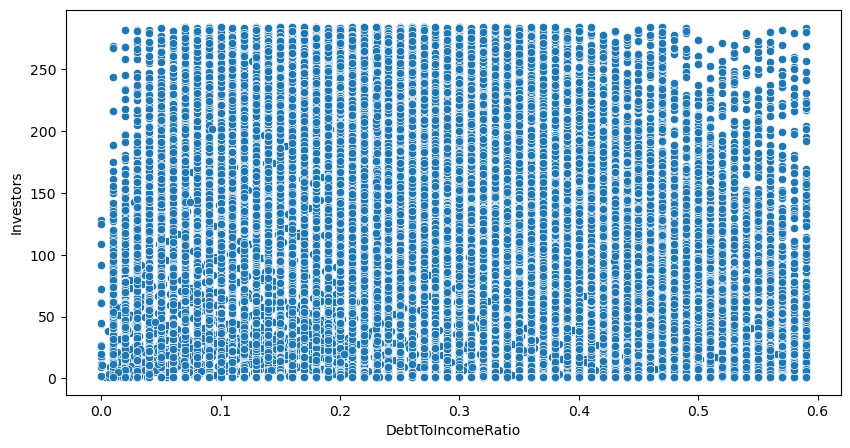

In [71]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=final_data, x='DebtToIncomeRatio',y='Investors')

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Now the data points are removed out of outliers

<AxesSubplot:xlabel='ProsperScore', ylabel='LoanOriginalAmount'>

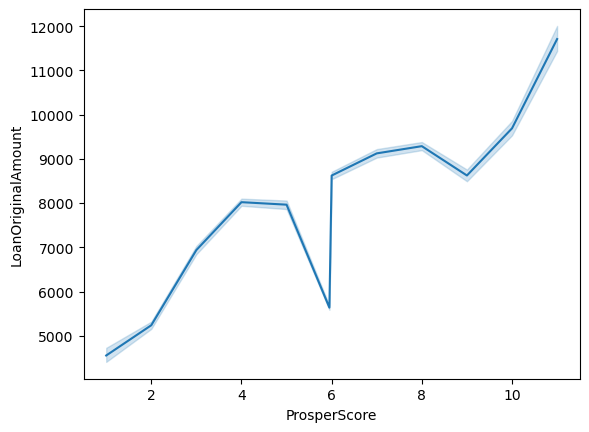

In [72]:
sns.lineplot(x = "ProsperScore",y = "LoanOriginalAmount",data = final_data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Lineplot we can show that as propser score inceases loan is increases but have reducing at prosper 6

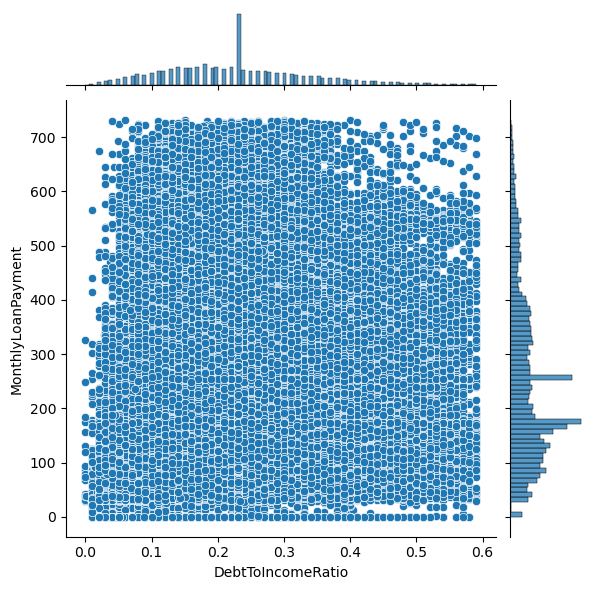

In [73]:
sns.jointplot(x = "DebtToIncomeRatio",y = "MonthlyLoanPayment",data = final_data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Distribution has happened as outliers are removed

<AxesSubplot:xlabel='ProsperScore', ylabel='ListingCategory (numeric)'>

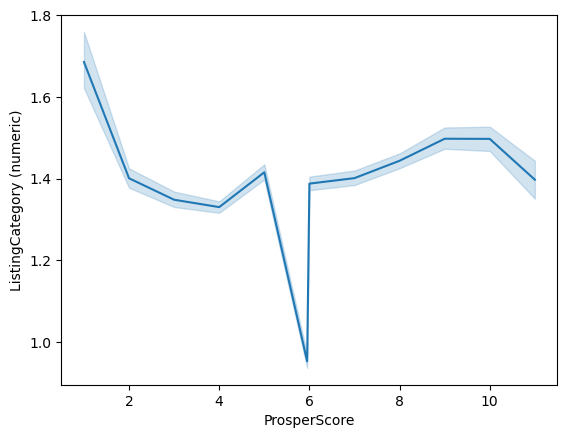

In [74]:
sns.lineplot(x="ProsperScore",y = "ListingCategory (numeric)",data = final_data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Lineplot we can show that as propser score decrease loan is decrease but have huge reducing at prosper 6

<AxesSubplot:xlabel='ProsperScore', ylabel='DebtToIncomeRatio'>

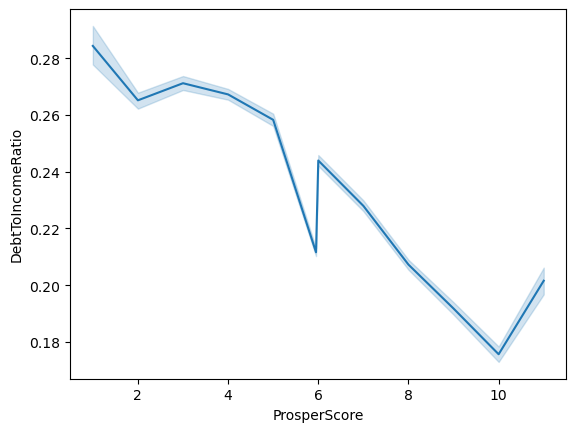

In [75]:
sns.lineplot(x = "ProsperScore",y = "DebtToIncomeRatio",data = final_data)

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Lineplot we can show that as propser score decrease loan is decrease but have huge reducing at prosper 6

#### Categorical vs Numerical

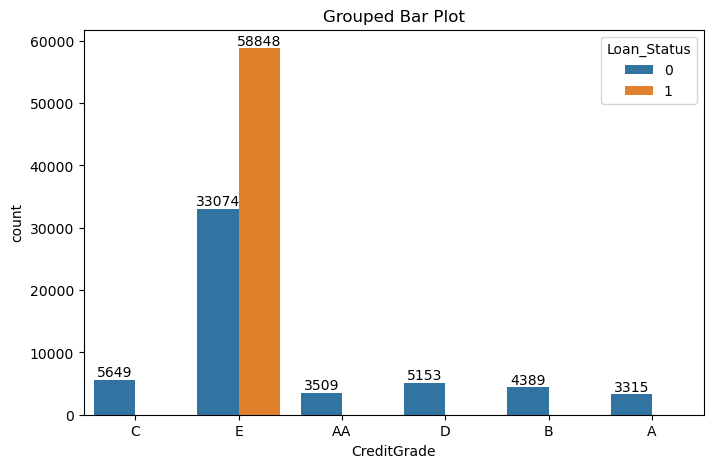

In [76]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=final_data, x='CreditGrade', hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Grouped Bar Plot')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Creit Grade of E is having (1 count of 58848)

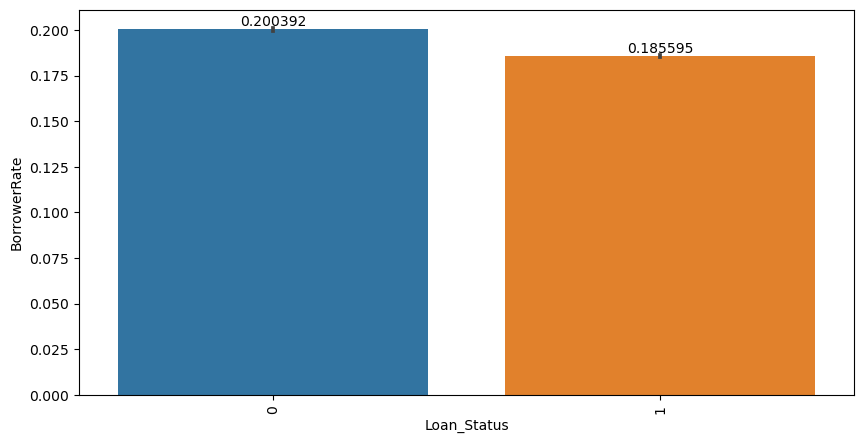

In [77]:
plt.figure(figsize=(10,5))
ls = sns.barplot(data = final_data, x = 'Loan_Status',y = 'BorrowerRate')
for i in ls.containers:
    ls.bar_label(i,)
plt.xticks(rotation = 90)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The Loan status (no or 0) states that it having high borrower rate and vice-versa

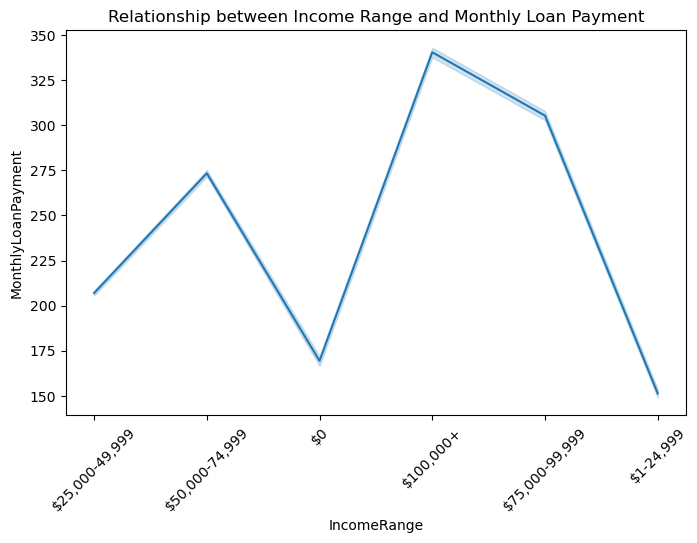

In [78]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=final_data, x="IncomeRange", y="MonthlyLoanPayment")
plt.title('Relationship between Income Range and Monthly Loan Payment')
plt.xticks(rotation=45)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- The line plot illustrates a distinct pattern in the relationship between Income Range and Monthly Loan Payment. 
- Notably, there is a sharp decline in Monthly Loan Payments for the income range of $1-24,999, 
- Followed by a subsequent upward trend as Monthly Loan Payments increase across higher income ranges.

Text(0.5, 1.0, 'Relationship between Prosper Score and Borrower Rate')

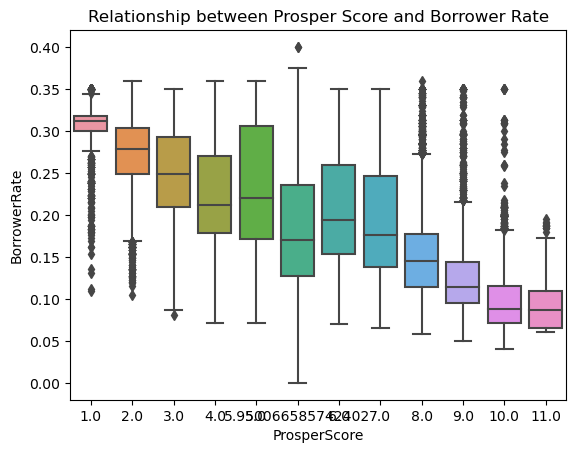

In [79]:
sns.boxplot(data=final_data,x='ProsperScore',y='BorrowerRate')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.title('Relationship between Prosper Score and Borrower Rate')

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Prosper score of <span style="color:yellow">1.0,9.0,10.0,8.0,2,0</span> are having high outliers.
- The Interquartile Ranges is also vary from each prosper score.

Text(0.5, 0.98, 'Estimated Returns by Income Range and Credit Ratings')

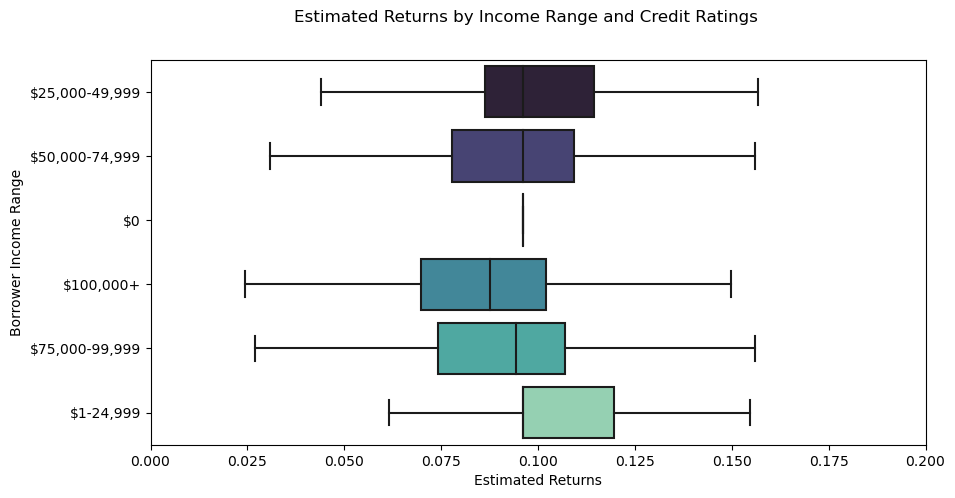

In [80]:
# boxplots
plt.figure(figsize = [10, 5])
sns.boxplot(data = final_data,  x = 'EstimatedReturn', y= 'IncomeRange', palette = "mako", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Income Range')
plt.xlabel('Estimated Returns')
plt.suptitle('Estimated Returns by Income Range and Credit Ratings')

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- We are able to witness that as borrower income range increases, the median for the rate of estimated returns is decreasing and also equal some where. 
- As a result, we can conclude that as the borrower has a higher income range, he/she has more probability to repay the loan back.

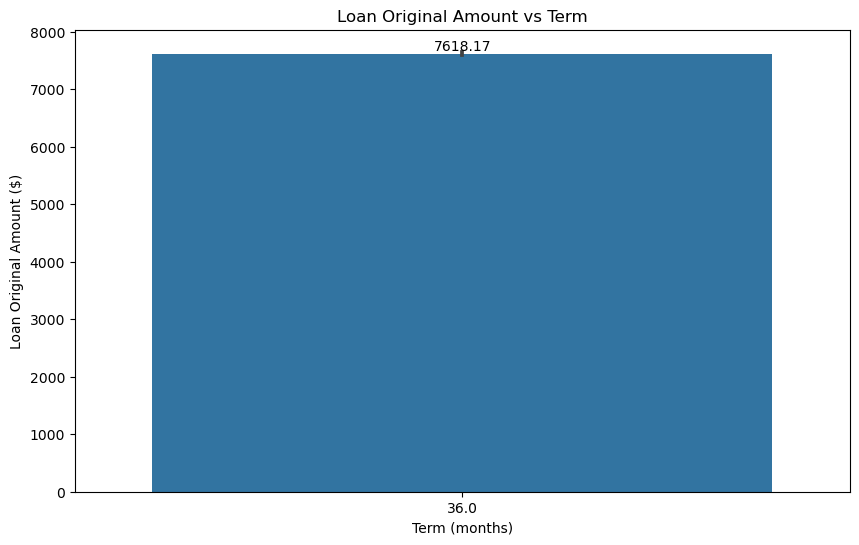

In [81]:
# Box plot for Loan Original Amount vs Term
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=final_data, x='Term', y='LoanOriginalAmount')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Loan Original Amount vs Term')
plt.xlabel('Term (months)')
plt.ylabel('Loan Original Amount ($)')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this plot it is clearly stating that loanoriginalamount is higher w.r.t 36 tenure/term/months only after outlier of loan repay.

Categorical vs Categorical

<AxesSubplot:xlabel='Occupation'>

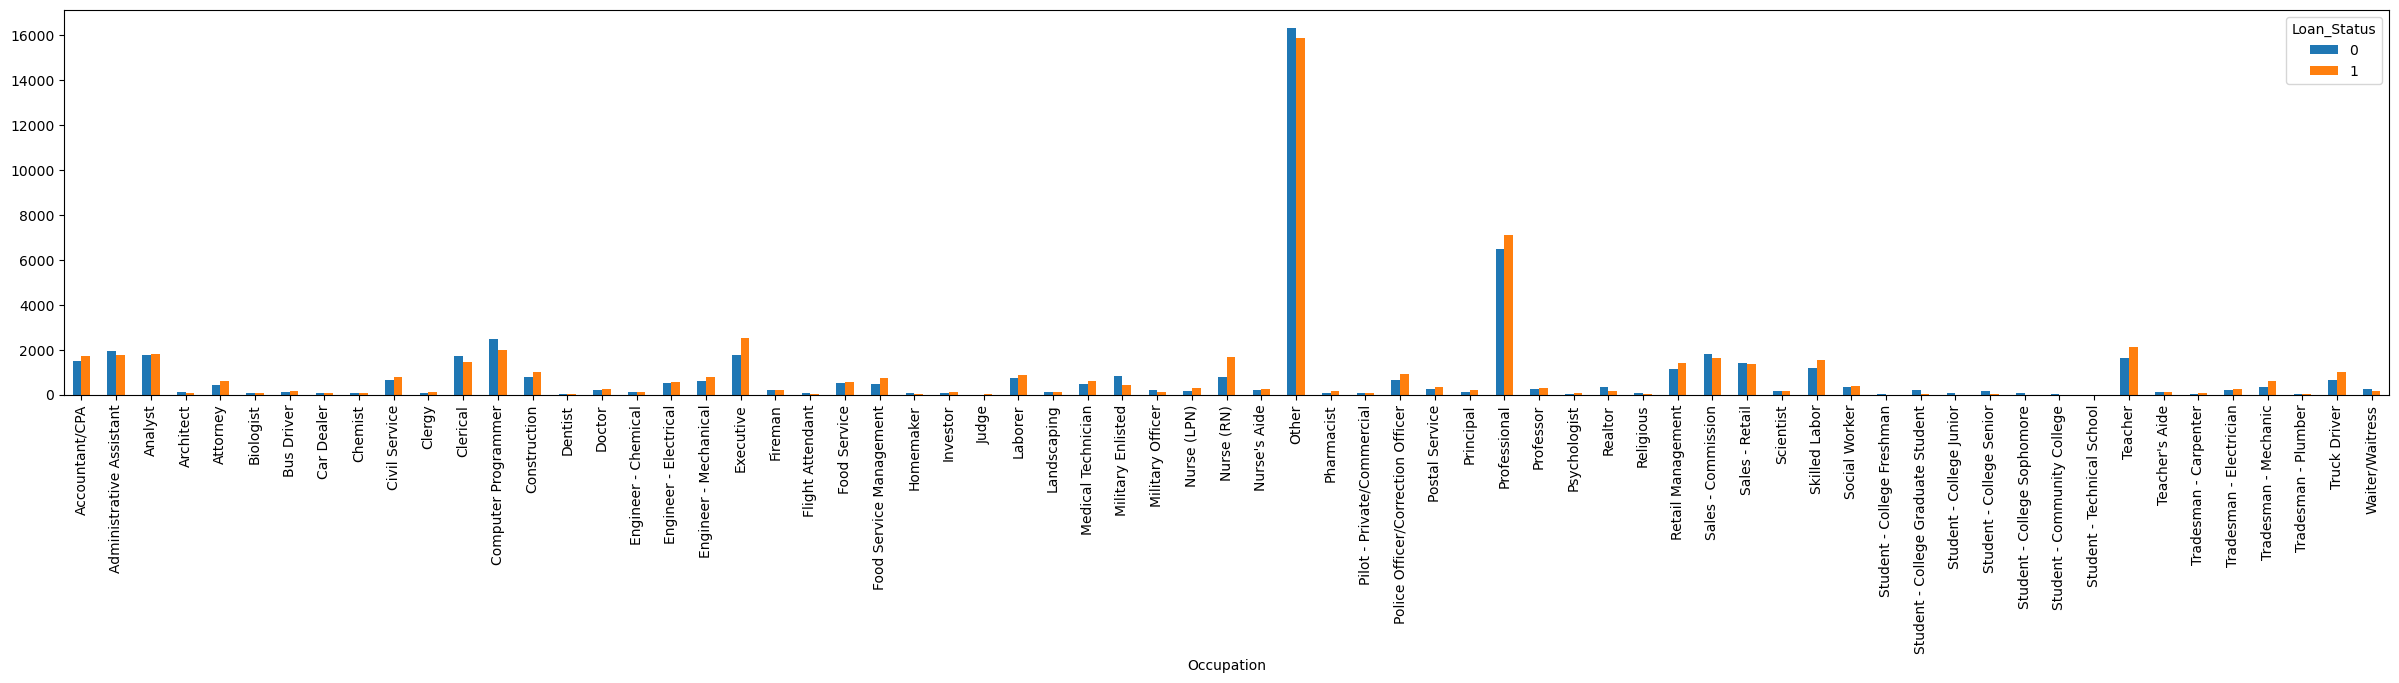

In [82]:
crosstab = pd.crosstab(final_data['Occupation'],final_data['Loan_Status'])
crosstab.plot(kind = 'bar',stacked = False,figsize=(30,5))

<AxesSubplot:xlabel='EmploymentStatus'>

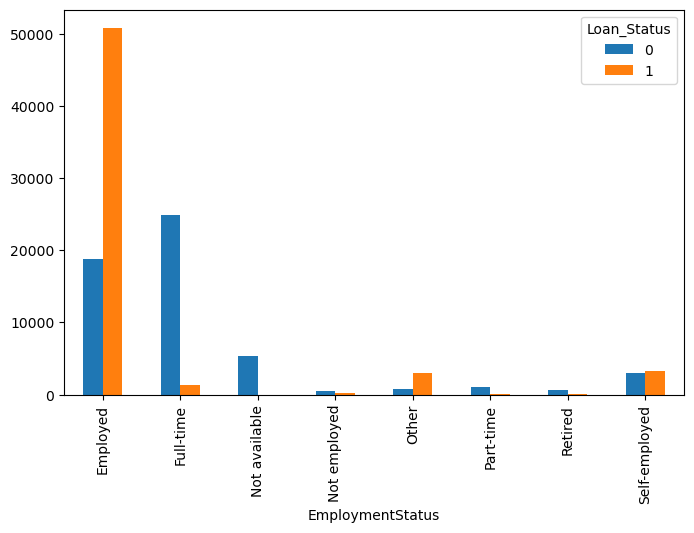

In [83]:
crosstab1 = pd.crosstab(final_data['EmploymentStatus'],final_data['Loan_Status'])
crosstab1.plot(kind = 'bar',stacked = False,figsize=(8,5))

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- people with employed and having loan status yes is high

### <span style="color:#E6E6FA; font-family: Georgia">Multivariate Analysis</span>

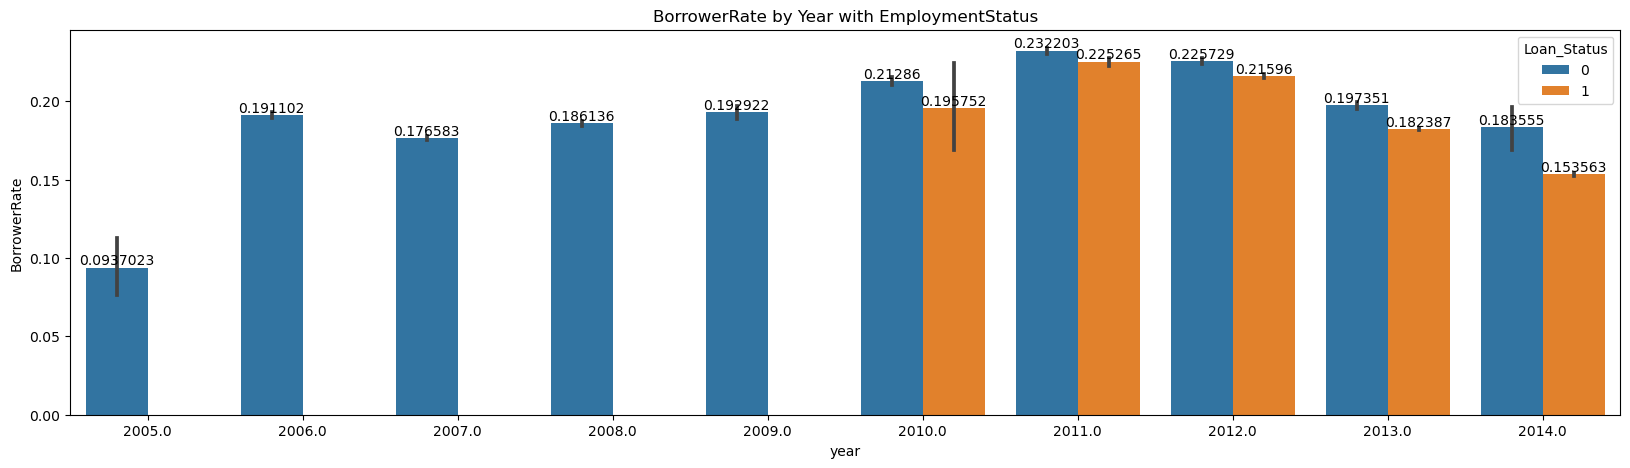

In [84]:
plt.figure(figsize = (20,5))
ax = sns.barplot(x = 'year',y = 'BorrowerRate',hue = 'Loan_Status', data = final_data )
for i in ax.containers:
    ax.bar_label(i,)
plt.title('BorrowerRate by Year with EmploymentStatus')
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- Borrower Rate will no Repayment is noticed high in 2011 also Borrower Rate with Repayment also noticed in 2011

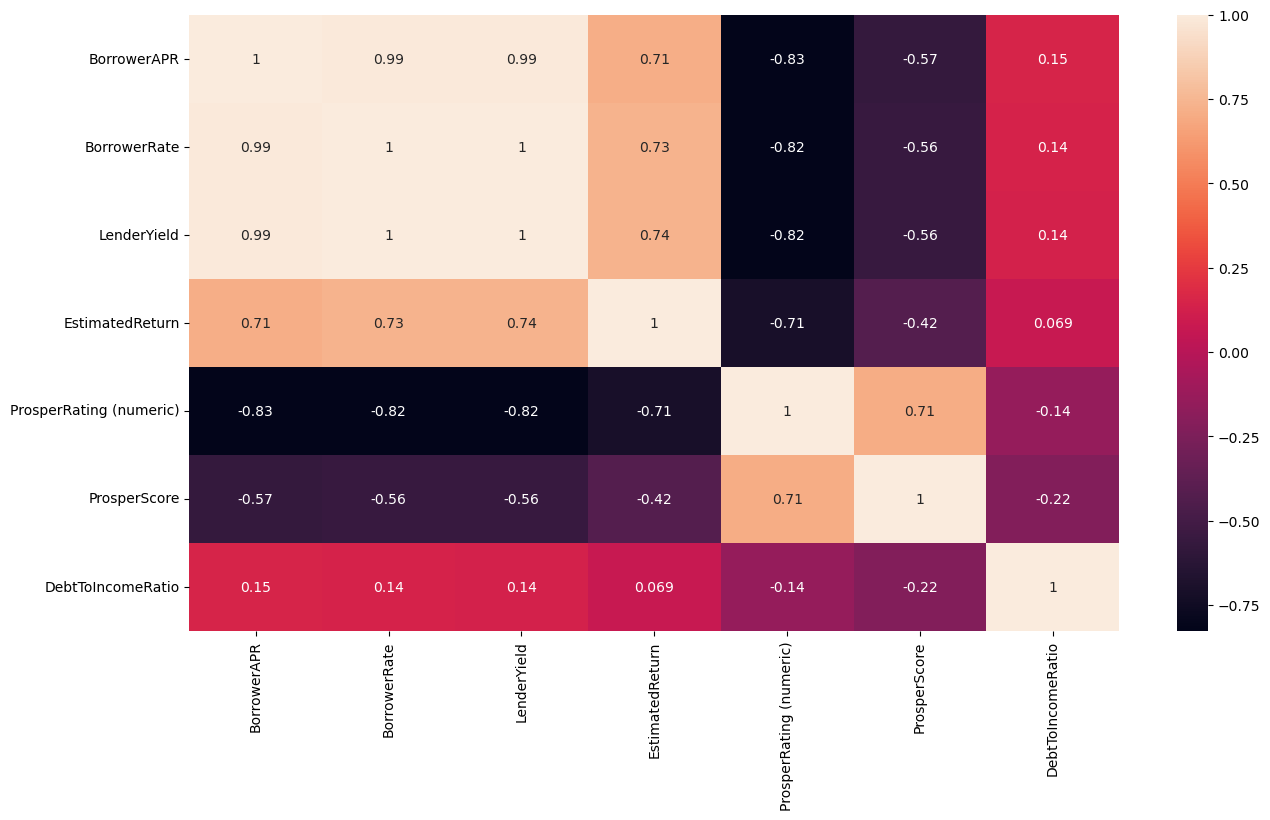

In [85]:
plt.figure(figsize = (15,8))
sns.heatmap(final_data[['BorrowerAPR','BorrowerRate','LenderYield','EstimatedReturn','ProsperRating (numeric)','ProsperScore','DebtToIncomeRatio']].corr(),annot = True)
plt.show()

### <span style="color:lightgreen;font-family:Consolas">Findings:- </span>
- In this Heat map it explains that BorrowerAPR, BorrowerRate and the LenderYield having high correlation of 0.99 and in the feature we can take only one column instead of all.
- Estimated Return w.r.t BorrowerAPR, BorrowerRate and the LenderYield  are also giving positive correlation with 0.71,0.0.73,0.74
- ProsperScore, ProsperRating(numeric) having a positive correlation of 0.71

In [86]:
## Dropping the Unwanted or duplicated columns
final_data.drop(columns = 'LoanStatus',inplace = True)

### Regression Analysis

Coefficient:[0.92110379]
Intercept:[-0.00880669]


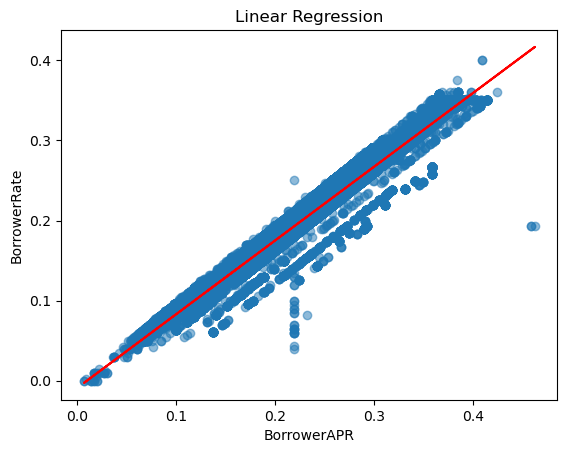

In [94]:
X = final_data[['BorrowerAPR']]
y = final_data[['BorrowerRate']]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
# print coefficients and intercepts
print(f"Coefficient:{lr.coef_[0]}")
print(f"Intercept:{lr.intercept_}")
# visualing the linear regression line
plt.scatter(X,y,alpha =0.5)
plt.plot(X,lr.predict(X),color = 'red')
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title('Linear Regression')
plt.show()

Coefficient:[2.19084684]
Intercept:[-0.01790772]


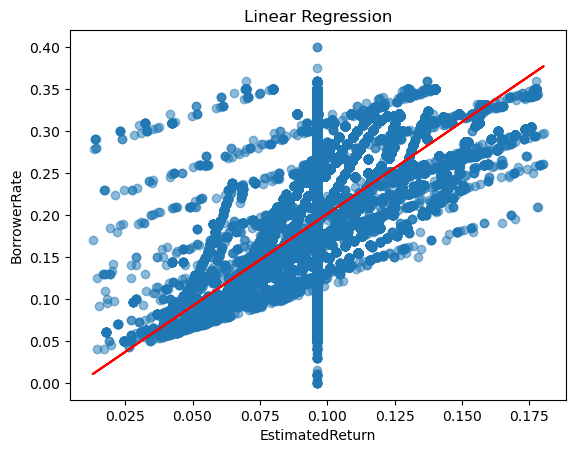

In [95]:
X = final_data[['EstimatedReturn']]
y = final_data[['BorrowerRate']]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
# print coefficients and intercepts
print(f"Coefficient:{lr.coef_[0]}")
print(f"Intercept:{lr.intercept_}")
# visualing the linear regression line
plt.scatter(X,y,alpha =0.5)
plt.plot(X,lr.predict(X),color = 'red')
plt.xlabel('EstimatedReturn')
plt.ylabel('BorrowerRate')
plt.title('Linear Regression')
plt.show()

Coefficient:[1.00326427]
Intercept:[0.00946659]


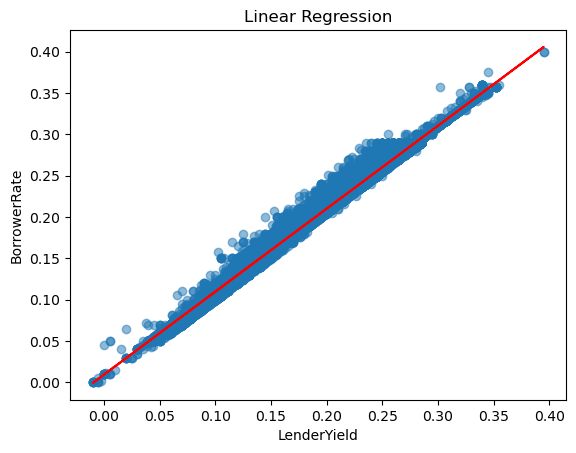

In [96]:
X = final_data[['LenderYield']]
y = final_data[['BorrowerRate']]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
# print coefficients and intercepts
print(f"Coefficient:{lr.coef_[0]}")
print(f"Intercept:{lr.intercept_}")
# visualing the linear regression line
plt.scatter(X,y,alpha =0.5)
plt.plot(X,lr.predict(X),color = 'red')
plt.xlabel('LenderYield')
plt.ylabel('BorrowerRate')
plt.title('Linear Regression')
plt.show()

Coefficient:[-0.02040418]
Intercept:[0.31415563]


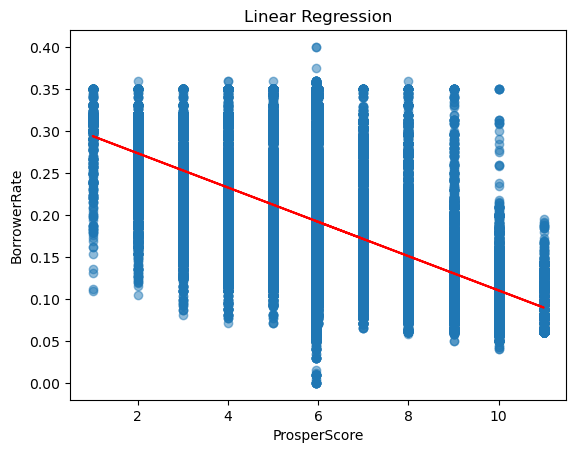

In [97]:
X = final_data[['ProsperScore']]
y = final_data[['BorrowerRate']]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
# print coefficients and intercepts
print(f"Coefficient:{lr.coef_[0]}")
print(f"Intercept:{lr.intercept_}")
# visualing the linear regression line
plt.scatter(X,y,alpha =0.5)
plt.plot(X,lr.predict(X),color = 'red')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.title('Linear Regression')
plt.show()

### Cluster Analysis

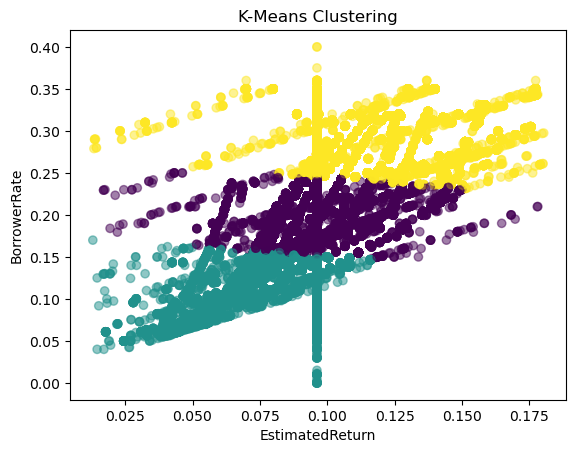

In [98]:
cluster_data = final_data[['EstimatedReturn','BorrowerRate']]
from sklearn.cluster import KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(cluster_data)

# Creating a new column for indicating the cluster for each data point
final_data['cluster'] =kmeans.labels_

# visulaisation 
plt.scatter(final_data['EstimatedReturn'],final_data['BorrowerRate'],c = final_data['cluster'],cmap = 'viridis',alpha = 0.5)
plt.title('K-Means Clustering')
plt.xlabel('EstimatedReturn')
plt.ylabel('BorrowerRate')
plt.show()

# Train-Test Split

In [97]:
X1 = final_data[['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)','EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines','OpenCreditLines', 'TotalCreditLinespast7years','OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies','AmountDelinquent', 'DelinquenciesLast7Years','PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization','AvailableBankcardCredit', 'TotalTrades','TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome','TotalProsperLoans', 'TotalProsperPaymentsBilled','OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'LP_CustomerPayments','LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees','LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations','InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount','Investors', 'year','CreditGrade',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation','EmploymentStatus', 'LoanOriginationQuarter']]
y1 = final_data[['Loan_Status']]

In [98]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X1,y1,test_size=0.3,random_state = 0)

In [99]:
X_train_1.head(2)

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
102686       263644.0  36.0      0.30564         0.290        0.280   
87006        486765.0  36.0      0.26864         0.234        0.224   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
102686                 0.168866       0.079506         0.096153   
87006                  0.131700       0.087000         0.131700   

        ProsperRating (numeric)  ProsperScore  ...  \
102686                 4.072243      5.950067  ...   
87006                  4.000000      6.000000  ...   

        InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  \
102686                         0.0                          0.0       75.0   
87006                          0.0                          0.0       82.0   

          year  CreditGrade  ProsperRating (Alpha)  BorrowerState  \
102686  2008.0            B                      C             CA   
87006   2010.0            E                      C             NY   

                      Occupation  EmploymentStatus  LoanOriginationQuarter  
102686                   Teacher         Full-time                 Q1 2008  
87006   Administrative Assistant          Employed                 Q4 2010  

[2 rows x 73 columns]

In [100]:
X_test_1.head(2)

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
38063       132526.0  36.0      0.20735        0.2000       0.1900   
87263      1106848.0  36.0      0.21166        0.1875       0.1775   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
38063                 0.168866       0.079506         0.096153   
87263                 0.164630       0.082400         0.082230   

       ProsperRating (numeric)  ProsperScore  ...  InvestmentFromFriendsCount  \
38063                 4.072243      5.950067  ...                         0.0   
87263                 4.000000      5.000000  ...                         0.0   

       InvestmentFromFriendsAmount  Investors    year  CreditGrade  \
38063                          0.0      112.0  2007.0            C   
87263                          0.0       91.0  2014.0            E   

       ProsperRating (Alpha)  BorrowerState    Occupation  EmploymentStatus  \
38063                      C             CA         Other         Full-time   
87263                      C             NY  Professional          Employed   

       LoanOriginationQuarter  
38063                 Q2 2007  
87263                 Q1 2014  

[2 rows x 73 columns]

In [101]:
y_train_1.dtypes

Loan_Status    category
dtype: object

In [102]:
y_train_1.head(2)

Loan_Status
102686           0
87006            0

# <span style="color:yellow; font-family: Lucida Console">FEATURE ENGINEERING</span>

In [103]:
# Assuming 'X_num' contains your Numerical features
X_num = X_train_1.select_dtypes(include = ['int64','float64'])
y_c = y_train_1['Loan_Status']
model = LinearRegression(n_jobs = 5)
rfe = RFE(model)
rfe.fit(X_num, y_c)

selected_numerical_features = X_num.columns[rfe.support_]

# Before making the chi-square test of finding the p-value
#we need to first do the label encoding
X_cat = X_train_1.select_dtypes(include = 'object')
label_encoder = LabelEncoder()
X_cat_encoder = X_cat.apply(label_encoder.fit_transform)

#calculating the chi-square 

chi2_result = chi2(X_cat_encoder, y_c)

selected_categorical_features = X_cat.columns[chi2_result[1] < 0.05]  # Select significant categorical features (p-value threshold 0.05)

# Combine selected numerical and categorical features
selected_features = list(selected_numerical_features) + list(selected_categorical_features)

rfe_features = pd.DataFrame({'feautres':selected_features})
rfe_features

feautres
0                          BorrowerAPR
1                         BorrowerRate
2                          LenderYield
3              EstimatedEffectiveYield
4                        EstimatedLoss
5                      EstimatedReturn
6              ProsperRating (numeric)
7                         ProsperScore
8            ListingCategory (numeric)
9             EmploymentStatusDuration
10               CreditScoreRangeLower
11               CreditScoreRangeUpper
12                  CurrentCreditLines
13                     OpenCreditLines
14          TotalCreditLinespast7years
15               OpenRevolvingAccounts
16                InquiriesLast6Months
17                      TotalInquiries
18             DelinquenciesLast7Years
19                 BankcardUtilization
20                         TotalTrades
21  TradesNeverDelinquent (percentage)
22             TradesOpenedLast6Months
23                   DebtToIncomeRatio
24                   TotalProsperLoans
25          TotalProsperPaymentsBilled
26               OnTimeProsperPayments
27       LoanFirstDefaultedCycleNumber
28          LoanMonthsSinceOrigination
29                      LP_ServiceFees
30                           Investors
31                                year
32                         CreditGrade
33               ProsperRating (Alpha)
34                       BorrowerState
35                          Occupation
36                    EmploymentStatus
37              LoanOriginationQuarter

In [104]:
# Assuming 'X_num' contains your Numerical features
X_num = X_train_1.select_dtypes(include = ['int64','float64'])
y_c = y_train_1['Loan_Status']
model = LinearRegression(n_jobs = 2)
rfe = RFE(model, n_features_to_select= 20)  # Select top 20 numerical features
rfe.fit(X_num, y_c)

selected_numerical_features = X_num.columns[rfe.support_]

# Before making the chi-square test of finding the p-value
#we need to first do the label encoding
X_cat = X_train_1.select_dtypes(include = 'object')
label_encoder = LabelEncoder()
X_cat_encoder = X_cat.apply(label_encoder.fit_transform)

#calculating the chi-square 

chi2_result = chi2(X_cat_encoder, y_c)

selected_categorical_features = X_cat.columns[chi2_result[1] < 0.10]  # Select significant categorical features (p-value threshold 0.05)

# Combine selected numerical and categorical features
selected_features = list(selected_numerical_features) + list(selected_categorical_features)

rfe_features = pd.DataFrame({'feautres':selected_features})
rfe_features

feautres
0                          BorrowerAPR
1                         BorrowerRate
2                          LenderYield
3              EstimatedEffectiveYield
4                        EstimatedLoss
5                      EstimatedReturn
6              ProsperRating (numeric)
7                         ProsperScore
8            ListingCategory (numeric)
9                      OpenCreditLines
10               OpenRevolvingAccounts
11                InquiriesLast6Months
12             DelinquenciesLast7Years
13                 BankcardUtilization
14  TradesNeverDelinquent (percentage)
15             TradesOpenedLast6Months
16                   DebtToIncomeRatio
17       LoanFirstDefaultedCycleNumber
18          LoanMonthsSinceOrigination
19                                year
20                         CreditGrade
21               ProsperRating (Alpha)
22                       BorrowerState
23                          Occupation
24                    EmploymentStatus
25              LoanOriginationQuarter

In [105]:
# Assuming 'X_num' contains your Numerical features
X_num = X_train_1.select_dtypes(include = ['int64','float64'])
y_c = y_train_1['Loan_Status']
model = LinearRegression(n_jobs = 2)
rfe = RFE(model, n_features_to_select= 10)  # Select top 10 numerical features
rfe.fit(X_num, y_c)

selected_numerical_features = X_num.columns[rfe.support_]

# Before making the chi-square test of finding the p-value
#we need to first do the label encoding
X_cat = X_train_1.select_dtypes(include = 'object')
label_encoder = LabelEncoder()
X_cat_encoder = X_cat.apply(label_encoder.fit_transform)

#calculating the chi-square 

chi2_result = chi2(X_cat_encoder, y_c)

selected_categorical_features = X_cat.columns[chi2_result[1] < 0.10]  # Select significant categorical features (p-value threshold 0.05)

# Combine selected numerical and categorical features
selected_features = list(selected_numerical_features) + list(selected_categorical_features)

rfe_features = pd.DataFrame({'feautres':selected_features})
rfe_features

feautres
0                          BorrowerAPR
1                         BorrowerRate
2                          LenderYield
3              EstimatedEffectiveYield
4                        EstimatedLoss
5                      EstimatedReturn
6              ProsperRating (numeric)
7                  BankcardUtilization
8   TradesNeverDelinquent (percentage)
9                    DebtToIncomeRatio
10                         CreditGrade
11               ProsperRating (Alpha)
12                       BorrowerState
13                          Occupation
14                    EmploymentStatus
15              LoanOriginationQuarter

### Mutual Information

In [106]:
mutual_info_num = mutual_info_regression(X_num, y_c)
mutual_info_cat = mutual_info_classif(X_cat_encoder, y_c)


mutual_info_combined = pd.Series(mutual_info_num, index=X_num.columns).append(
    pd.Series(mutual_info_cat, index=X_cat_encoder.columns))

# Sort and select top-k features
top_k_features = mutual_info_combined.sort_values(ascending=False).head(40)

print(top_k_features)

selected_features_MI = top_k_features.index

LoanNumber                            0.440478
ListingNumber                         0.440343
LoanMonthsSinceOrigination            0.434303
EstimatedEffectiveYield               0.426657
year                                  0.425669
EstimatedReturn                       0.421807
BorrowerAPR                           0.411217
EstimatedLoss                         0.404769
BorrowerRate                          0.340444
LenderYield                           0.332802
LP_CustomerPrincipalPayments          0.328853
MonthlyLoanPayment                    0.255705
ProsperRating (numeric)               0.255671
ProsperScore                          0.249336
LP_CustomerPayments                   0.195898
CreditGrade                           0.172540
ListingCategory (numeric)             0.161476
Investors                             0.135660
LoanOriginalAmount                    0.126489
LoanFirstDefaultedCycleNumber         0.121967
LP_ServiceFees                        0.111634
LP_Interestan

C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2730312908.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mutual_info_combined = pd.Series(mutual_info_num, index=X_num.columns).append(


In [107]:
mutual_info_num = mutual_info_regression(X_num, y_c)
mutual_info_cat = mutual_info_classif(X_cat_encoder, y_c)


mutual_info_combined = pd.Series(mutual_info_num, index=X_num.columns).append(
    pd.Series(mutual_info_cat, index=X_cat_encoder.columns))

# Sort and select top-k features
top_k_features = mutual_info_combined.sort_values(ascending=False).head(30)

print(top_k_features)

selected_features_MI = top_k_features.index

LoanNumber                            0.440387
LoanMonthsSinceOrigination            0.440361
ListingNumber                         0.440336
EstimatedEffectiveYield               0.430207
year                                  0.427696
EstimatedReturn                       0.419677
BorrowerAPR                           0.413764
EstimatedLoss                         0.405677
BorrowerRate                          0.335602
LenderYield                           0.334963
LP_CustomerPrincipalPayments          0.329737
MonthlyLoanPayment                    0.253669
ProsperRating (numeric)               0.251015
ProsperScore                          0.250908
LP_CustomerPayments                   0.197171
CreditGrade                           0.173389
ListingCategory (numeric)             0.170061
Investors                             0.141204
LoanOriginalAmount                    0.126294
LoanFirstDefaultedCycleNumber         0.124700
LP_ServiceFees                        0.113757
LP_Interestan

C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2534705931.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mutual_info_combined = pd.Series(mutual_info_num, index=X_num.columns).append(


In [108]:
mutual_info_num = mutual_info_regression(X_num, y_c)
mutual_info_cat = mutual_info_classif(X_cat_encoder, y_c)


mutual_info_combined = pd.Series(mutual_info_num, index=X_num.columns).append(
    pd.Series(mutual_info_cat, index=X_cat_encoder.columns))

# Sort and select top-k features
top_k_features = mutual_info_combined.sort_values(ascending=False).head(20)

print(top_k_features)

selected_features_MI = top_k_features.index

LoanNumber                       0.440518
ListingNumber                    0.440317
LoanMonthsSinceOrigination       0.438326
EstimatedEffectiveYield          0.429339
year                             0.426566
EstimatedReturn                  0.420958
EstimatedLoss                    0.411635
BorrowerAPR                      0.409210
BorrowerRate                     0.338687
LenderYield                      0.333957
LP_CustomerPrincipalPayments     0.332666
MonthlyLoanPayment               0.256748
ProsperRating (numeric)          0.250219
ProsperScore                     0.247106
LP_CustomerPayments              0.197387
CreditGrade                      0.170418
ListingCategory (numeric)        0.167687
Investors                        0.131373
LoanFirstDefaultedCycleNumber    0.125222
LoanOriginalAmount               0.121199
dtype: float64


C:\Users\nites\AppData\Local\Temp\ipykernel_8908\1293577097.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mutual_info_combined = pd.Series(mutual_info_num, index=X_num.columns).append(


# PRINCIPAL COMPONENT ANALYSIS(PCA)

In [109]:
pca_num = X_train_1.select_dtypes(include = ['float64','int64'])
pca_cat = X_train_1.select_dtypes(include = ['object'])
lb = LabelEncoder()
pca_cat_le = pca_cat.apply(label_encoder.fit_transform)
pca_data = pd.concat([pca_num,pca_cat_le],axis = 1)

In [110]:
# Assuming 'df' is your DataFrame with columns and 'target_column' is your target category column
# Separate features and target
features = pca_data
target = y_train_1['Loan_Status']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=30)
pca.fit(scaled_features)

# Get the explained variance ratio and select components explaining most variance (e.g., 95%)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) # Selecting components explaining 95% variance

# Fit PCA with selected components
pca1 = PCA(n_components=num_components)
principal_components = pca1.fit_transform(scaled_features)

# Get the indices of top features contributing to principal components
top_feature_indices = pca1.components_.argsort(axis=1)[:, ::-1][:, :num_components]

# Get the column names of top features
top_feature_names = features.columns[top_feature_indices.flatten()].unique()

# Create a DataFrame with the selected top features
selected_features_df = features[top_feature_names]

# Concatenate selected features DataFrame with the target column
result_df = pd.concat([selected_features_df, target], axis=1)


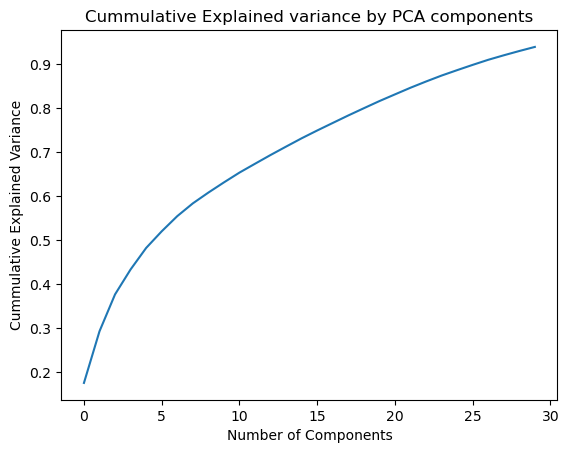

In [111]:
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Cummulative Explained variance by PCA components')
plt.show()

## To Check the Variance and Principal Components

In [112]:
def apply_pca(pca_data, standardize=True):
    # Standardize
    if standardize:
        X = (pca_data - pca_data.mean(axis=0)) / pca_data.std(axis=0)
    # Create principal components
    pca = PCA(n_components=30)
    X_pca = pca.fit_transform(pca_data)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings
apply_pca(X_num)

(PCA(n_components=30),
                  PC1           PC2           PC3          PC4          PC5  \
 0      366812.707228   9896.187922  -8266.477426  4372.400682 -2700.157421   
 1      142950.822372 -10468.606467    403.457089 -3627.447520 -6146.586498   
 2      408711.850973   1677.246473  -2030.220603  2694.099410  -419.418405   
 3      459469.399738  -9953.516415  -1819.532914  1708.553569  2142.903109   
 4     -569632.113320  -5477.797033  15621.807988  5223.927264 -5207.551063   
 ...              ...           ...           ...          ...          ...   
 79750 -343551.277134   3170.505133  13267.034115 -4001.129594 -1895.002836   
 79751  -23030.389204 -10751.904688   1578.136752  -247.160939  4855.044559   
 79752  418642.877380  -8158.151838  -3134.402426   453.004721   597.611536   
 79753  611400.593676   2396.620984  -1006.173260 -3902.912342  5590.381365   
 79754 -304484.778853  -6796.602900  10131.212661 -1369.094214   321.231129   
 
                PC6        

In [113]:
result_df

Loan_Status
102686           0
87006            0
98307            0
99514            0
84026            1
...            ...
21243            1
45891            1
42613            0
43567            0
68268            1

[79755 rows x 1 columns]

# Model Building 

In [99]:

X = final_data[['BorrowerAPR','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore','ListingCategory (numeric)',
                'IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts',
                'InquiriesLast6Months','TotalInquiries','DelinquenciesLast7Years','BankcardUtilization','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months',
                'DebtToIncomeRatio','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LP_ServiceFees','Investors',
                'year','CreditGrade','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','LoanOriginationQuarter']]
y = final_data['Loan_Status']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [100]:
X.shape

(113937, 37)

# <span style="color:green; font-family: Lucida Console">PRE-PROCESSING</span>

### Scaling

In [102]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
X_train_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)

In [103]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_rescale = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

### One-Hot Encoding

In [107]:
X_train_cat = X_train[['BorrowerState','Occupation','EmploymentStatus','LoanOriginationQuarter']]
encoder = OneHotEncoder(drop = 'first',sparse=False,handle_unknown='error')
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),columns = encoder.get_feature_names_out(X_train_cat.columns), index = X_train_cat.index)

In [108]:
X_test_cat = X_test[['BorrowerState','Occupation','EmploymentStatus','LoanOriginationQuarter']]
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),columns = encoder.get_feature_names_out(X_test_cat.columns), index = X_test_cat.index)

### Label Encoding

In [109]:
X_train_cat_le = X_train[['CreditGrade','ProsperRating (Alpha)']]
X_test_cat_le = X_test[['CreditGrade','ProsperRating (Alpha)']]

In [110]:
credit_grade = {'AA':0,'A':1,'B':2,'C':3,'D':4,'E':5}
X_train_cat_le['CreditGrade'] = X_train_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])
X_test_cat_le['CreditGrade'] = X_test_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])

C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\2558116757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['CreditGrade'] = X_train_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])
C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\2558116757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le['CreditGrade'] = X_test_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])


In [111]:
pr = {'A':1,'B':2,'C':3,'D':4,'E':5,'AA':6,'HR':7}
X_train_cat_le['ProsperRating (Alpha)'] = X_train_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])
X_test_cat_le['ProsperRating (Alpha)'] = X_test_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])

C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\611092552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['ProsperRating (Alpha)'] = X_train_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])
C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\611092552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le['ProsperRating (Alpha)'] = X_test_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])


In [113]:
X_train_transformed = pd.concat([X_train_rescale,X_train_cat_ohe,X_train_cat_le], axis = 1)
X_test_transformed = pd.concat([X_test_rescale,X_test_cat_ohe,X_test_cat_le],axis = 1)

# <span style="color:pink; font-family: Lucida Console">CROSS VALIDATION</span>

In [124]:
model = RandomForestClassifier()
cv_scores = cross_val_score(model,X_train_transformed,y_train,cv =5)
print(f"cross- validation scores are: {cv_scores}")

print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train the model 
model.fit(X_train_transformed,y_train)

#Evaluate the test
test_acc = model.score(X_test_transformed,y_test)

print(f"Test set accuracy:{test_acc}")

cross- validation scores are: [0.9255846  0.93022381 0.92771613 0.92947151 0.9263996 ]
Mean CV Accuracy: 0.9278791298351201
Test set accuracy:0.9266573050143351


In [125]:
model_1 = KNeighborsClassifier()
cv_scores = cross_val_score(model_1,X_train_transformed,y_train,cv =5)
print(f"cross- validation scores are: {cv_scores}")

print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train the model 
model_1.fit(X_train_transformed,y_train)

#Evaluate the test
test_acc = model_1.score(X_test_transformed,y_test)

print(f"Test set accuracy:{test_acc}")

cross- validation scores are: [0.87029026 0.87279794 0.87229641 0.87123064 0.86790797]
Mean CV Accuracy: 0.8709046454767726
Test set accuracy:0.8738809899947341


# <span style="color:pink; font-family: Lucida Console">MODELS VALIDATION USING RFE FEATURES</span>

### RFC Model without Hyper Parameters

In [126]:
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [127]:
# Doing predictions for the train Data Set
y_train_predict = rfc.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = rfc.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)

classification_rep = classification_report(y_test, y_test_predict)


print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")


print(f"classification Report: {classification_rep}")

train_accuracy: 1.0
test_accuracy: 0.926013691416535
classification Report:               precision    recall  f1-score   support

           0       0.95      0.89      0.92     16579
           1       0.90      0.96      0.93     17603

    accuracy                           0.93     34182
   macro avg       0.93      0.93      0.93     34182
weighted avg       0.93      0.93      0.93     34182



### KNC Model without Hyper Parameters

In [128]:
knc = KNeighborsClassifier()
knc.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [129]:
# Doing predictions for the train Data Set
y_train_predict = knc.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = knc.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)

classification_rep = classification_report(y_test, y_test_predict)



print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")

print(f"classification Report: {classification_rep}")

train_accuracy: 0.9112657513635509
test_accuracy: 0.8738809899947341
classification Report:               precision    recall  f1-score   support

           0       0.92      0.81      0.86     16579
           1       0.84      0.93      0.88     17603

    accuracy                           0.87     34182
   macro avg       0.88      0.87      0.87     34182
weighted avg       0.88      0.87      0.87     34182



## Using Hyper Parameters

##### RFC Model-1

In [130]:
rfc1 = RandomForestClassifier(n_estimators= 200, criterion ="gini",max_depth= 15, max_features ="sqrt",random_state = 0, bootstrap = True,verbose = 0)
rfc1.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=0)

In [131]:
# Doing predictions for the train Data Set
y_train_predict = rfc1.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = rfc1.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)

print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")

train_accuracy: 0.9411949094100683
test_accuracy: 0.9179977766075712


##### RFC Model-2

In [132]:
rfc2 = RandomForestClassifier(n_estimators= 100,criterion ="entropy",max_depth= 13,random_state = 0)
rfc2.fit(X_train_transformed,y_train)

RandomForestClassifier(criterion='entropy', max_depth=13, random_state=0)

In [133]:
# Doing predictions for the train Data Set
y_train_predict = rfc2.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = rfc2.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)



print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")

train_accuracy: 0.9289574321359162
test_accuracy: 0.9153063015622257


##### RFC Model-3

In [134]:
rfc3 = RandomForestClassifier(n_estimators= 300, criterion ="log_loss",max_depth= 14,random_state = 0)
rfc3.fit(X_train_transformed,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=14, n_estimators=300,
                       random_state=0)

In [135]:
# Doing predictions for the train Data Set
y_train_predict = rfc3.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = rfc3.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)



print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")

train_accuracy: 0.9329070277725534
test_accuracy: 0.917412673336844


##### KNC Model-1

##### KNC Model-2

In [138]:
knc2 = KNeighborsClassifier(n_neighbors = 7, weights = "distance",metric = "minkowski",n_jobs=2)
knc2.fit(X_train_transformed,y_train)

KNeighborsClassifier(n_jobs=2, n_neighbors=7, weights='distance')

In [139]:
# Doing predictions for the train Data Set
y_train_predict = knc2.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = knc2.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)



print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")

train_accuracy: 1.0
test_accuracy: 0.8756948101339886


##### KNC Model-2

In [140]:
knc3 = KNeighborsClassifier(n_neighbors = 3, weights = "uniform",metric = "manhattan",n_jobs=2)
knc3.fit(X_train_transformed,y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=2, n_neighbors=3)

In [141]:
# Doing predictions for the train Data Set
y_train_predict = knc2.predict(X_train_transformed)

# Doing predictions for the Test Data Set 
y_test_predict = knc2.predict(X_test_transformed)


train_accuracy = accuracy_score(y_train,y_train_predict) 

test_accuracy = accuracy_score(y_test,y_test_predict)



print(f"train_accuracy: {train_accuracy}")

print(f"test_accuracy: {test_accuracy}")

train_accuracy: 1.0
test_accuracy: 0.8756948101339886


# <span style="color:pink; font-family: Lucida Console">MODELS VALIDATION USING MUTUAL SCORES FEATURES</span>

In [142]:
X_m = final_data[['LoanNumber','ListingNumber','LoanMonthsSinceOrigination','EstimatedEffectiveYield','year','EstimatedReturn','BorrowerAPR','EstimatedLoss',
                  'LP_CustomerPrincipalPayments','LenderYield','MonthlyLoanPayment','ProsperScore','ProsperRating (numeric)','LP_CustomerPayments','CreditGrade',
                  'ListingCategory (numeric)','Investors','LoanOriginalAmount','LoanFirstDefaultedCycleNumber','LP_ServiceFees','LP_InterestandFees','CreditScoreRangeUpper',
                   'BankcardUtilization','CreditScoreRangeLower','TradesNeverDelinquent (percentage)','LoanOriginationQuarter','OpenRevolvingMonthlyPayment','TotalTrades',
                   'OpenCreditLines','CurrentCreditLines','InquiriesLast6Months','RevolvingCreditBalance','TotalInquiries','TradesOpenedLast6Months','OpenRevolvingAccounts',
                   'AvailableBankcardCredit','EmploymentStatus','ProsperRating (Alpha)','EmploymentStatusDuration']]
y_m = final_data['Loan_Status']

In [143]:
X_train_m,X_test_m,y_train_m,y_test_m = train_test_split(X_m,y_m,test_size=0.3,random_state = 0)

In [144]:
X_train_num_m = X_train_m.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
X_train_rescale_m = pd.DataFrame(scaler.fit_transform(X_train_num_m),columns = X_train_num_m.columns,index = X_train_num_m.index)
X_test_num_m = X_test_m.select_dtypes(include=['int64','float64'])
X_test_rescale_m = pd.DataFrame(scaler.transform(X_test_num_m),columns = X_test_num_m.columns,index = X_test_num_m.index)

In [145]:
X_train_cat_m = X_train_m[['EmploymentStatus','LoanOriginationQuarter']]
encoder = OneHotEncoder(drop = 'first', sparse_output= False,handle_unknown='error')
X_train_cat_ohe_m = pd.DataFrame(encoder.fit_transform(X_train_cat_m),columns = encoder.get_feature_names_out(X_train_cat_m.columns), index = X_train_cat_m.index)
X_test_cat_m = X_test_m[['EmploymentStatus','LoanOriginationQuarter']]
X_test_cat_ohe_m = pd.DataFrame(encoder.transform(X_test_cat_m),columns = encoder.get_feature_names_out(X_test_cat_m.columns), index = X_test_cat_m.index)

In [146]:
X_train_cat_le_m = X_train_m[['CreditGrade','ProsperRating (Alpha)']]
X_test_cat_le_m = X_test_m[['CreditGrade','ProsperRating (Alpha)']]
credit_grade = {'AA':0,'A':1,'B':2,'C':3,'D':4,'E':5}
X_train_cat_le_m['CreditGrade'] = X_train_cat_le_m['CreditGrade'].apply(lambda x:credit_grade[x])
X_test_cat_le_m['CreditGrade'] = X_test_cat_le_m['CreditGrade'].apply(lambda x:credit_grade[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2162385158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le_m['CreditGrade'] = X_train_cat_le_m['CreditGrade'].apply(lambda x:credit_grade[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2162385158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le_m['CreditGrade'] = X_test_cat_le_m['CreditGrade'].apply(lambda x:credit_grade[x])


In [147]:
pr = {'A':1,'B':2,'C':3,'D':4,'E':5,'AA':6,'HR':7}
X_train_cat_le_m['ProsperRating (Alpha)'] = X_train_cat_le_m['ProsperRating (Alpha)'].apply(lambda x:pr[x])
X_test_cat_le_m['ProsperRating (Alpha)'] = X_test_cat_le_m['ProsperRating (Alpha)'].apply(lambda x:pr[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_8908\1852412630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le_m['ProsperRating (Alpha)'] = X_train_cat_le_m['ProsperRating (Alpha)'].apply(lambda x:pr[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_8908\1852412630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le_m['ProsperRating (Alpha)'] = X_test_cat_le_m['ProsperRating (Alpha)'].apply(lambda x:pr[x])


In [148]:
X_train_transformed_m = pd.concat([X_train_rescale_m,X_train_cat_ohe_m,X_train_cat_le_m], axis = 1)
X_test_transformed_m = pd.concat([X_test_rescale_m,X_test_cat_ohe_m,X_test_cat_le_m],axis = 1)

# Evaluation

In [149]:
model_m = RandomForestClassifier()
cv_scores = cross_val_score(model_m,X_train_transformed_m,y_train_m,cv =5)
print(f"cross- validation scores are: {cv_scores}")

print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train the model 
model_m.fit(X_train_transformed_m,y_train_m)

#Evaluate the test
test_acc = model_m.score(X_test_transformed_m,y_test_m)

print(f"Test set accuracy:{test_acc}")

cross- validation scores are: [0.98783775 0.98927967 0.98758699 0.98689737 0.9882766 ]
Mean CV Accuracy: 0.9879756755062378
Test set accuracy:0.9887367620384998


In [152]:
model_p_k = KNeighborsClassifier()
cv_scores = cross_val_score(model_p_k,X_train_transformed_m,y_train_m,cv =5)
print(f"cross- validation scores are: {cv_scores}")

print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train the model 
model_p_k.fit(X_train_transformed_m,y_train_m)

#Evaluate the test
test_acc = model_p_k.score(X_test_transformed_m,y_test_m)

print(f"Test set accuracy:{test_acc}")

cross- validation scores are: [0.92922074 0.92828036 0.9279669  0.92702652 0.92802959]
Mean CV Accuracy: 0.9281048210143563
Test set accuracy:0.9287051664618805


In [153]:
rfc_m = RandomForestClassifier(n_estimators=100,criterion = 'gini',max_depth = 13)
rfc_m.fit(X_train_transformed_m,y_train_m)
# Doing predictions for the train Data Set
y_train_predict_m = rfc_m.predict(X_train_transformed_m)

# Doing predictions for the Test Data Set 
y_test_predict_m = rfc_m.predict(X_test_transformed_m)


train_accuracy_m = accuracy_score(y_train_m,y_train_predict_m) 

test_accuracy_m = accuracy_score(y_test_m,y_test_predict_m)

classification_rep_m = classification_report(y_test_m, y_test_predict_m)


print(f"train_accuracy: {train_accuracy_m}")

print(f"test_accuracy: {test_accuracy_m}")


print(f"classification Report: {classification_rep_m}")

train_accuracy: 0.9931791110275218
test_accuracy: 0.9784974548007723
classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98     16579
           1       0.98      0.98      0.98     17603

    accuracy                           0.98     34182
   macro avg       0.98      0.98      0.98     34182
weighted avg       0.98      0.98      0.98     34182



In [154]:

knc_m = KNeighborsClassifier(n_jobs=2,n_neighbors=5,weights = 'uniform')
knc_m.fit(X_train_transformed_m,y_train_m)
# Doing predictions for the train Data Set
y_train_predict_m = knc_m.predict(X_train_transformed_m)

# Doing predictions for the Test Data Set 
y_test_predict_m = knc_m.predict(X_test_transformed_m)


train_accuracy_m = accuracy_score(y_train_m,y_train_predict_m) 

test_accuracy_m = accuracy_score(y_test_m,y_test_predict_m)

classification_rep_m = classification_report(y_test_m, y_test_predict_m)



print(f"train_accuracy: {train_accuracy_m}")

print(f"test_accuracy: {test_accuracy_m}")

print(f"classification Report: {classification_rep_m}")

train_accuracy: 0.9528556203372829
test_accuracy: 0.9287051664618805
classification Report:               precision    recall  f1-score   support

           0       0.97      0.88      0.92     16579
           1       0.90      0.97      0.93     17603

    accuracy                           0.93     34182
   macro avg       0.93      0.93      0.93     34182
weighted avg       0.93      0.93      0.93     34182



# <span style="color:pink; font-family: Lucida Console">MODELS VALIDATION USING PCA COMPONENTS</span>

In [155]:
X_p = final_data[['ProsperRating (numeric)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'LoanOriginalAmount', 'ProsperScore', 'MonthlyLoanPayment',
                   'AvailableBankcardCredit', 'LoanNumber', 'ListingNumber', 'OpenRevolvingAccounts', 'OpenCreditLines', 'TradesNeverDelinquent (percentage)', 
                   'CurrentCreditLines', 'OpenRevolvingMonthlyPayment', 'StatedMonthlyIncome', 'year', 'RevolvingCreditBalance', 'TotalTrades', 'IsBorrowerHomeowner',
                     'TotalCreditLinespast7years', 'ProsperPrincipalBorrowed', 'Investors', 'EmploymentStatusDuration', 'ScorexChangeAtTimeOfListing', 'ProsperPrincipalOutstanding', 
                     'TotalProsperLoans', 'DebtToIncomeRatio', 'LoanFirstDefaultedCycleNumber', 'OnTimeProsperPayments', 'BorrowerAPR', 'LenderYield', 
                     'BankcardUtilization', 'EstimatedLoss', 'EstimatedEffectiveYield', 'LP_ServiceFees', 'EstimatedReturn', 'TradesOpenedLast6Months', 'TotalProsperPaymentsBilled', 
                     'LP_CustomerPayments', 'LP_InterestandFees', 'LP_CustomerPrincipalPayments', 'LoanMonthsSinceOrigination', 'TotalInquiries', 'InquiriesLast6Months',
                       'ListingCategory (numeric)', 'Term', 'DelinquenciesLast7Years', 'PercentFunded', 'IncomeVerifiable','BorrowerState','Occupation','EmploymentStatus','LoanOriginationQuarter',
                       'CreditGrade','ProsperRating (Alpha)']]
y_p = final_data['Loan_Status']

In [156]:
X_train_p,X_test_p,y_train_p,y_test_p = train_test_split(X_p,y_p,test_size=0.3,random_state = 0)

In [157]:
X_train_num_p = X_train_p.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
X_train_rescale_p = pd.DataFrame(scaler.fit_transform(X_train_num_p),columns = X_train_num_p.columns,index = X_train_num_p.index)
X_test_num_p = X_test_p.select_dtypes(include=['int64','float64'])
X_test_rescale_p = pd.DataFrame(scaler.transform(X_test_num_p),columns = X_test_num_p.columns,index = X_test_num_p.index)

In [158]:
X_train_cat_p = X_train_p[['BorrowerState','Occupation','EmploymentStatus','LoanOriginationQuarter']]
encoder = OneHotEncoder(drop = 'first', sparse_output= False,handle_unknown='error')
X_train_cat_ohe_p = pd.DataFrame(encoder.fit_transform(X_train_cat_p),columns = encoder.get_feature_names_out(X_train_cat_p.columns), index = X_train_cat_p.index)
X_test_cat_p = X_test_p[['BorrowerState','Occupation','EmploymentStatus','LoanOriginationQuarter']]
X_test_cat_ohe_p = pd.DataFrame(encoder.transform(X_test_cat_p),columns = encoder.get_feature_names_out(X_test_cat_p.columns), index = X_test_cat_p.index)

In [159]:
X_train_cat_le_p = X_train_p[['CreditGrade','ProsperRating (Alpha)']]
X_test_cat_le_p = X_test_p[['CreditGrade','ProsperRating (Alpha)']]
credit_grade = {'AA':0,'A':1,'B':2,'C':3,'D':4,'E':5}
X_train_cat_le_p['CreditGrade'] = X_train_cat_le_p['CreditGrade'].apply(lambda x:credit_grade[x])
X_test_cat_le_p['CreditGrade'] = X_test_cat_le_p['CreditGrade'].apply(lambda x:credit_grade[x])

pr = {'A':1,'B':2,'C':3,'D':4,'E':5,'AA':6,'HR':7}
X_train_cat_le_p['ProsperRating (Alpha)'] = X_train_cat_le_p['ProsperRating (Alpha)'].apply(lambda x:pr[x])
X_test_cat_le_p['ProsperRating (Alpha)'] = X_test_cat_le_p['ProsperRating (Alpha)'].apply(lambda x:pr[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2365794138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le_p['CreditGrade'] = X_train_cat_le_p['CreditGrade'].apply(lambda x:credit_grade[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2365794138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le_p['CreditGrade'] = X_test_cat_le_p['CreditGrade'].apply(lambda x:credit_grade[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_8908\2365794138.py:8: SettingWithCopyWarning: 
A v

In [160]:
X_train_transformed_p = pd.concat([X_train_rescale_p,X_train_cat_ohe_p,X_train_cat_le_p], axis = 1)
X_test_transformed_p = pd.concat([X_test_rescale_p,X_test_cat_ohe_p,X_test_cat_le_p],axis = 1)

# Evaluation

In [161]:
model_p = RandomForestClassifier()
cv_scores = cross_val_score(model_p,X_train_transformed_p,y_train_p,cv =5)
print(f"cross- validation scores are: {cv_scores}")

print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train the model 
model_p.fit(X_train_transformed_p,y_train_p)

#Evaluate the test
test_acc = model_p.score(X_test_transformed_p,y_test_p)

print(f"Test set accuracy:{test_acc}")

cross- validation scores are: [0.98181932 0.98125509 0.98131779 0.98075356 0.9827597 ]
Mean CV Accuracy: 0.9815810920945396
Test set accuracy:0.9824761570417179


In [162]:
model_p_k = KNeighborsClassifier()
cv_scores = cross_val_score(model_p_k,X_train_transformed_p,y_train_p,cv =5)
print(f"cross- validation scores are: {cv_scores}")

print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train the model 
model_p_k.fit(X_train_transformed_p,y_train_p)

#Evaluate the test
test_acc = model_p_k.score(X_test_transformed_p,y_test_p)

print(f"Test set accuracy:{test_acc}")

cross- validation scores are: [0.90959814 0.90633816 0.90815623 0.90972353 0.90470817]
Mean CV Accuracy: 0.9077048460911541
Test set accuracy:0.9092504827101984


In [163]:
rfc_p = RandomForestClassifier(n_estimators=100,criterion = 'gini',max_depth = 13)
rfc_p.fit(X_train_transformed_p,y_train_p)
# Doing predictions for the train Data Set
y_train_predict_p = rfc_p.predict(X_train_transformed_p)

# Doing predictions for the Test Data Set 
y_test_predict_p = rfc_p.predict(X_test_transformed_p)


train_accuracy_p = accuracy_score(y_train_p,y_train_predict_p) 

test_accuracy_p = accuracy_score(y_test_p,y_test_predict_p)

classification_rep_p = classification_report(y_test_p, y_test_predict_p)


print(f"train_accuracy: {train_accuracy_p}")

print(f"test_accuracy: {test_accuracy_p}")


print(f"classification Report: {classification_rep_p}")

train_accuracy: 0.9773932668798194
test_accuracy: 0.9593645778479901
classification Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96     16579
           1       0.95      0.97      0.96     17603

    accuracy                           0.96     34182
   macro avg       0.96      0.96      0.96     34182
weighted avg       0.96      0.96      0.96     34182



In [164]:
knc_p = KNeighborsClassifier(n_jobs=2,n_neighbors=5,weights = 'uniform')
knc_p.fit(X_train_transformed_p,y_train_p)
# Doing predictions for the train Data Set
y_train_predict_p = knc_p.predict(X_train_transformed_p)

# Doing predictions for the Test Data Set 
y_test_predict_p = knc_p.predict(X_test_transformed_p)


train_accuracy_p = accuracy_score(y_train_p,y_train_predict_p) 

test_accuracy_p = accuracy_score(y_test_p,y_test_predict_p)

classification_rep_p = classification_report(y_test_p, y_test_predict_p)



print(f"train_accuracy: {train_accuracy_p}")

print(f"test_accuracy: {test_accuracy_p}")

print(f"classification Report: {classification_rep_p}")

train_accuracy: 0.9415083693812301
test_accuracy: 0.9092504827101984
classification Report:               precision    recall  f1-score   support

           0       0.95      0.85      0.90     16579
           1       0.88      0.96      0.92     17603

    accuracy                           0.91     34182
   macro avg       0.91      0.91      0.91     34182
weighted avg       0.91      0.91      0.91     34182



# <span style="color:yellow; font-family: Lucida Console">FINAL RESULTS</span>

THE BEST FEATURES ARE

BEST_FEATURES = 'LoanNumber','ListingNumber','LoanMonthsSinceOrigination','EstimatedEffectiveYield','year','EstimatedReturn','BorrowerAPR','EstimatedLoss',
                  'LP_CustomerPrincipalPayments','LenderYield','MonthlyLoanPayment','ProsperScore','ProsperRating (numeric)','LP_CustomerPayments','CreditGrade',
                  'ListingCategory (numeric)','Investors','LoanOriginalAmount','LoanFirstDefaultedCycleNumber','LP_ServiceFees','LP_InterestandFees','CreditScoreRangeUpper',
                   'BankcardUtilization','CreditScoreRangeLower','TradesNeverDelinquent (percentage)','LoanOriginationQuarter','OpenRevolvingMonthlyPayment','TotalTrades',
                   'OpenCreditLines','CurrentCreditLines','InquiriesLast6Months','RevolvingCreditBalance','TotalInquiries','TradesOpenedLast6Months','OpenRevolvingAccounts',
                   'AvailableBankcardCredit','EmploymentStatus','ProsperRating (Alpha)','EmploymentStatusDuration'
TARGET = 'Loan_Status'

THE BEST MODEL IS RANDOM FOREST CLASSIFIER with HYPER PARAMETERS OF MAX_DEPTH (n_estimators=100,criterion = 'gini',max_depth = 13)

- cross- validation scores are: [0.98796314 0.98990659 0.9867093  0.9882766  0.98915428]
- Mean CV Accuracy: 0.9884019810670177
- Test set accuracy:0.9884442104031361

- train_accuracy: 0.9937684157733058
- test_accuracy: 0.9797846819963724
- classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98     16579
           1       0.98      0.98      0.98     17603

    accuracy                           0.98     34182
   macro avg       0.98      0.98      0.98     34182
weighted avg       0.98      0.98      0.98     34182

In [144]:
X=final_data[['LoanNumber','ListingNumber','LoanMonthsSinceOrigination','EstimatedEffectiveYield','year','EstimatedReturn','BorrowerAPR','EstimatedLoss', 'LP_CustomerPrincipalPayments','LenderYield','MonthlyLoanPayment','ProsperScore','ProsperRating (numeric)','LP_CustomerPayments','CreditGrade', 'ListingCategory (numeric)','Investors','LoanOriginalAmount','LoanFirstDefaultedCycleNumber','LP_ServiceFees','LP_InterestandFees','CreditScoreRangeUpper', 'BankcardUtilization','CreditScoreRangeLower','TradesNeverDelinquent (percentage)','LoanOriginationQuarter','OpenRevolvingMonthlyPayment','TotalTrades', 'OpenCreditLines','CurrentCreditLines','InquiriesLast6Months','RevolvingCreditBalance','TotalInquiries','TradesOpenedLast6Months','OpenRevolvingAccounts', 'AvailableBankcardCredit','EmploymentStatus','ProsperRating (Alpha)','EmploymentStatusDuration']]

In [145]:
y=final_data['Loan_Status']

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [146]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
X_train_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)

In [149]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_rescale = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

In [150]:
X_train_cat_le = X_train[['CreditGrade','ProsperRating (Alpha)']]
X_test_cat_le = X_test[['CreditGrade','ProsperRating (Alpha)']]

In [151]:
credit_grade = {'AA':0,'A':1,'B':2,'C':3,'D':4,'E':5}
X_train_cat_le['CreditGrade'] = X_train_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])
X_test_cat_le['CreditGrade'] = X_test_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])

C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\2558116757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['CreditGrade'] = X_train_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])
C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\2558116757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le['CreditGrade'] = X_test_cat_le['CreditGrade'].apply(lambda x:credit_grade[x])


In [152]:
pr = {'A':1,'B':2,'C':3,'D':4,'E':5,'AA':6,'HR':7}
X_train_cat_le['ProsperRating (Alpha)'] = X_train_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])
X_test_cat_le['ProsperRating (Alpha)'] = X_test_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])

C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\611092552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['ProsperRating (Alpha)'] = X_train_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])
C:\Users\oussa\AppData\Local\Temp\ipykernel_4780\611092552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le['ProsperRating (Alpha)'] = X_test_cat_le['ProsperRating (Alpha)'].apply(lambda x:pr[x])


In [153]:
X_train_transformed = pd.concat([X_train_rescale,X_train_cat_ohe,X_train_cat_le], axis = 1)
X_test_transformed = pd.concat([X_test_rescale,X_test_cat_ohe,X_test_cat_le],axis = 1)

In [159]:
import numpy as np
X_train_transformed=X_train_transformed.to_numpy()

In [160]:
X_test_transformed=X_test_transformed.to_numpy()

In [154]:
from sklearn.metrics import accuracy_score

In [164]:
#grid search on xgboost 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 7, 10],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [165]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
                            cv = 3)



In [166]:
# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

In [167]:
#xgb with best params
xgb = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500)
xgb.fit(X_train_transformed, y_train)
y_pred = xgb.predict(X_test_transformed )
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9942367327833362

<AxesSubplot:>

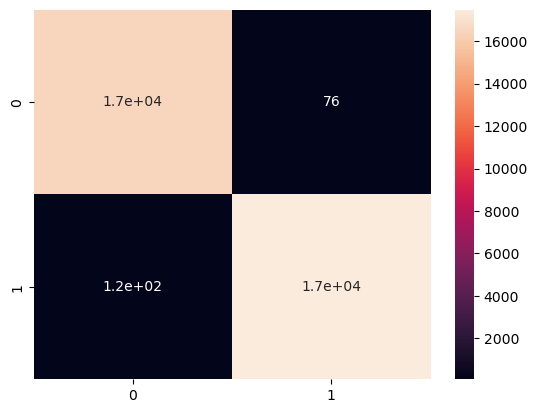

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [180]:
gbt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500)
gbt.fit(X_train_transformed, y_train)
y_pred = xgb.predict(X_test_transformed )
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9942367327833362

<AxesSubplot:>

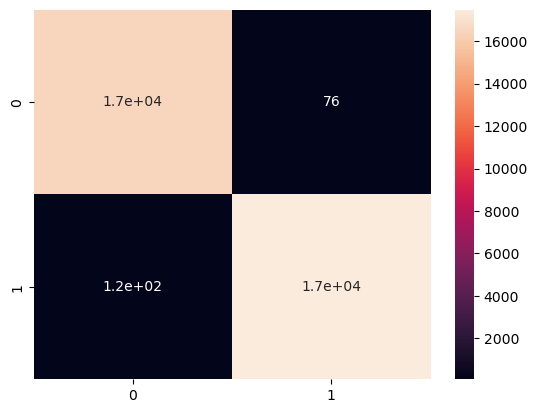

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)